# Projet 2 : Concevez une application au service de la santé publique

<img src= 'https://static.openfoodfacts.org/images/svg/openfoodfacts-logo-fr.svg' width=500/>

## Détails spécifiques pour le projet :

### __Scénario :__

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

--------------------------------------------------------------------------------------------------------

Le jeu de données Open Food Facts est disponible sur le site officiel : https://world.openfoodfacts.org/

--------------------------------------------------------------------------------------------------------

Les variables sont définies à cette adresse : https://world.openfoodfacts.org/data/data-fields.txt

--------------------------------------------------------------------------------------------------------

__Les champs sont séparés en quatre sections :__

 - nom, date de modification, etc.
 - Un ensemble de tags : catégorie du produit, localisation, origine, etc.
 - Les ingrédients composant les produits et leurs additifs éventuels.
 - Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

<img src= 'https://static.data.gouv.fr/images/9d/7b312080fe4f58868a928bddbff30f.png' width=500/>

### __Qu'est ce que le Nutriscore :__

Le Nutri-score est un système d'étiquetage nutritionnel à cinq niveaux, allant de A à E et du vert au rouge, établi en fonction de la valeur nutritionnelle d'un produit alimentaire. Il a pour but de favoriser le choix de produits plus sains d'un point de vue nutritionnel par les consommateurs et ainsi de participer à la lutte contre les maladies cardiovasculaires, l'obésité et le diabète de type 1.

Le score est calculé par un système de points, le score le plus faible étant le meilleur :

--------------------------------------------------------------------------------------------------------

__Eléments défavorables au score :__

apport calorique
teneur en sucre
teneur en graisses saturés
teneur en sel

--------------------------------------------------------------------------------------------------------

__Eléments favorables au score :__

teneur en fruits, légumes, légumineuses et oléagineux
teneur en fibres
teneur en protéines

--------------------------------------------------------------------------------------------------------

__Source :__
https://fr.wikipedia.org/wiki/Nutri-score

<img src= 'https://www.stylbio.fr/img/cms/images/gfx/logo-usda-organic.png' width=500/>

### __Qu'est ce que le Label Organic :__

Le label ORGANIC est une certification qui vous garantit qu'un produit est fabriqué avec le moins d'impact possible sur l'environnement tandis que le label BIO assure que les producteurs n'ont pas utilisé de pesticides ou autres produits chimiques pour cultiver leurs produits ou pour nourrir leurs animaux.

--------------------------------------------------------------------------------------------------------

Source : https://www.ams.usda.gov/rules-regulations/organic/labeling

# Mise en place du projet :

#### Import des librairies :

In [1]:
# Import des Librairies :

#Librairie d'analyse
import numpy as np
import pandas as pd

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#librairie de visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

# Pour supprimer les warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#### Import du CSV :

In [2]:
Data = pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t')

### Visu des colonnes et détection des NaN :

In [3]:
print('Le nombre de lignes et de colonnes et de', Data.shape)
Data.head(5)

Le nombre de lignes et de colonnes et de (320772, 162)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# listes des colonnes :
print(Data.columns.tolist()) 

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

#### Fonction de détection des NaN :

In [5]:
#pourcentage de valeurs manquantes
def pourcentage_valeurs_manquantes(data=Data):
    somme = 0
    for i in list(data.columns):
        somme += data[i].isna().sum()
    return round((somme / (data.shape[0]*data.shape[1]))*100,2)

print('Pour le jeu de données Data, nous avons :', pourcentage_valeurs_manquantes(Data) ,'% de valeurs manquantes.')

Pour le jeu de données Data, nous avons : 76.22 % de valeurs manquantes.


#### Boucle de détection des NaN par lignes :

In [6]:
# Detection de tout les NaN
column_with_nan = Data.columns[Data.isnull().any()]
Data.shape
# boucle 
for column in column_with_nan:
    print(column, Data[column].isnull().sum())

code 23
url 23
creator 2
created_t 3
created_datetime 9
product_name 17762
generic_name 267977
quantity 215953
packaging 241812
packaging_tags 241811
brands 28412
brands_tags 28420
categories 236362
categories_tags 236383
categories_fr 236361
origins 298582
origins_tags 298619
manufacturing_places 284271
manufacturing_places_tags 284277
labels 274213
labels_tags 274128
labels_fr 274106
emb_codes 291466
emb_codes_tags 291469
first_packaging_code_geo 301969
cities 320749
cities_tags 300452
purchase_places 262579
stores 269050
countries 280
countries_tags 280
countries_fr 280
ingredients_text 71810
allergens 292428
allergens_fr 320753
traces 296419
traces_tags 296443
traces_fr 296420
serving_size 109441
no_nutriments 320772
additives_n 71833
additives 71867
additives_tags 166092
additives_fr 166092
ingredients_from_palm_oil_n 71833
ingredients_from_palm_oil 320772
ingredients_from_palm_oil_tags 315937
ingredients_that_may_be_from_palm_oil_n 71833
ingredients_that_may_be_from_palm_oil 3207

In [7]:
# On peut voir qu'il y a énormément de colonnes avec des NaN
## Certains NaN peuvent être considérés comme des données à 0 (Exemple les fibres)

### Pnns_groups_1 :

In [8]:
Data.pnns_groups_1.unique()
# on voit qu'il y a des doublons et des nan à supprimer ici.

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [9]:
Data['pnns_groups_1'] = Data['pnns_groups_1'].replace(np.nan,'Inconnu')
Data.replace({ 'unknown': 'Inconnu',
               'Fruits and vegetables': 'Fruits et Légumes',
               'Sugary snacks': 'Snacks sucré',
               'Cereals and potatoes': 'Céréales et pomme de terres', 
               'Composite foods': 'Aliments composés', 
               'Fish Meat Eggs': 'Poissons,Viandes et Oeufs',
               'Beverages': 'Boissons', 
               'Fat and sauces':'Produits gras et Sauces', 
               'fruits-and-vegetables': 'Fruits et Légumes',
               'Milk and dairy products': 'Produits Laitiers', 
               'Salty snacks': 'Snacks salé', 
               'sugary-snacks':'Snacks sucré',
               'cereals-and-potatoes' :'Céréales et pomme de terres', 
               'salty-snacks': 'Snacks salé',
                          }, inplace=True)

In [10]:
Data.pnns_groups_1.unique()
# On renomme les produits pour éviter les doublons dû aux majuscules.
## On modifie les NaN en Inconnu pour éviter que cette colonne se retrouve imputé par données manquantes.
### On s'interesse qu'aux marchés français de ce fait on renomme les colonnes en français

array(['Inconnu', 'Fruits et Légumes', 'Snacks sucré',
       'Céréales et pomme de terres', 'Aliments composés',
       'Poissons,Viandes et Oeufs', 'Boissons', 'Produits gras et Sauces',
       'Produits Laitiers', 'Snacks salé'], dtype=object)

#### Fonction pour les valeurs manquantes post_traitement :

In [11]:
#pourcentage de valeurs manquantes
def pourcentage_valeurs_manquantes(data=Data):
    somme = 0
    for i in list(data.columns):
        somme += data[i].isna().sum()
    return round((somme / (data.shape[0]*data.shape[1]))*100,2)

print('Pour le jeu de données Data, nous avons :', pourcentage_valeurs_manquantes(Data) ,'% de valeurs manquantes.')

Pour le jeu de données Data, nous avons : 75.78 % de valeurs manquantes.


In [12]:
# Gain de 0.5% de données manquantes

## Visu des NaN par colonnes :

In [13]:
# Calcul du pourcentage de Nan dans les colonnes
Size = Data.shape
Valeurs_nulles = Data.isna().sum()
Valeurs_nulles = (Valeurs_nulles.sort_values(ascending= True)*100)/Size[0]
Valeurs_nulles

last_modified_t                            0.000000
last_modified_datetime                     0.000000
pnns_groups_1                              0.000000
creator                                    0.000623
created_t                                  0.000935
                                            ...    
ingredients_that_may_be_from_palm_oil    100.000000
ingredients_from_palm_oil                100.000000
no_nutriments                            100.000000
nervonic-acid_100g                       100.000000
water-hardness_100g                      100.000000
Length: 162, dtype: float64

### Graph :

#### Densité de NaN sur mon DF :

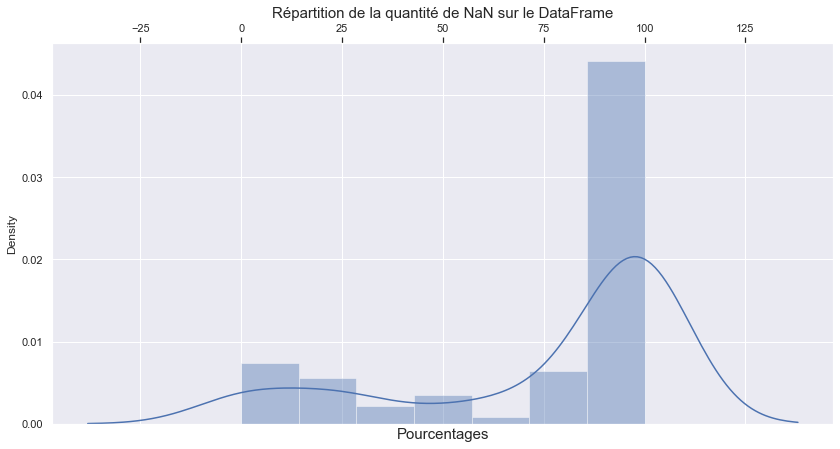

In [14]:
sns.set(style="dark")
plt.figure(figsize=(14,7))
ax = sns.distplot(Valeurs_nulles.values)
ax.xaxis.set_ticks_position('top')
plt.title('Répartition de la quantité de NaN sur le DataFrame', size=15)
plt.xlabel('Pourcentages',size=15)
plt.grid(True)
plt.show()

#### Précision des NaN sur mon DF :

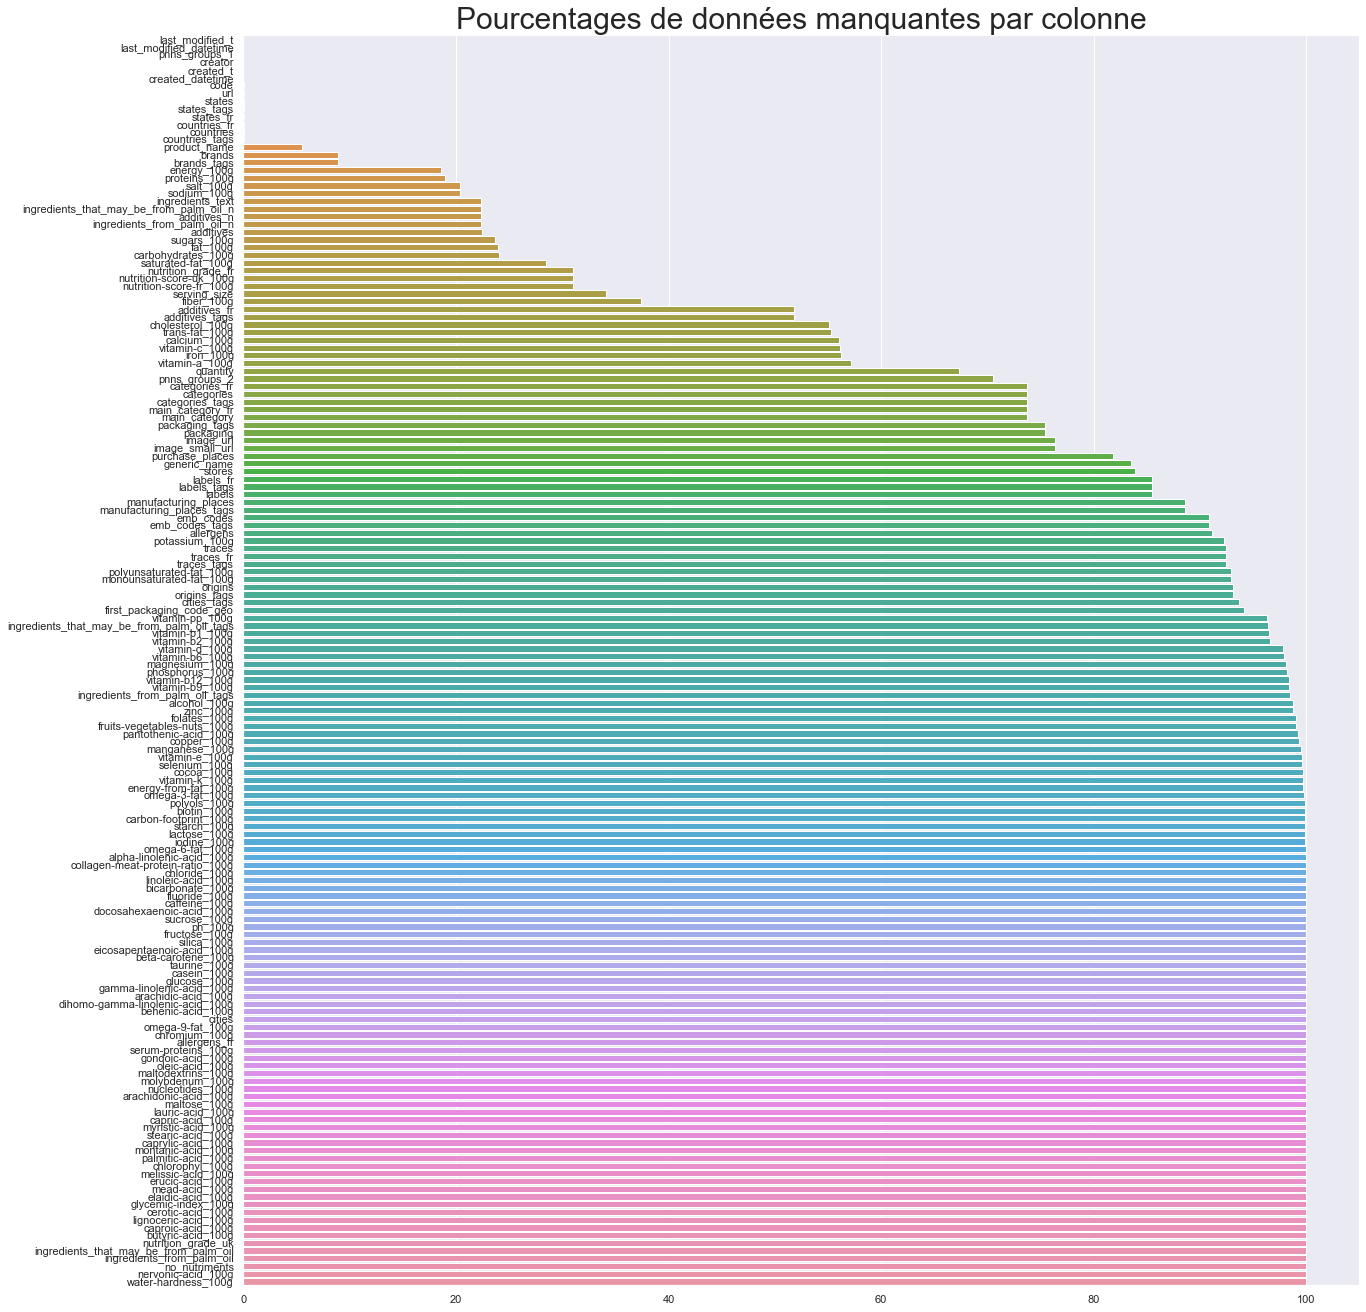

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 23))
ax = sns.barplot(y = Valeurs_nulles.index, x=Valeurs_nulles.values)
plt.title('Pourcentages de données manquantes par colonne', size=30)
plt.show()

Au vu du % de valeur manquantes, on aura tendance à se focaliser sur les 75% de données manquantes.

#### Visu des colonnes uniquements inférieur à 40% de NaN :

In [16]:
# Affichage des colonnes avec des colonnes qui ont moins de 40% de NaN
Pourcentage_Valeurs_nulles = Valeurs_nulles[Valeurs_nulles < 40 ]
Pourcentage_Valeurs_nulles

last_modified_t                             0.000000
last_modified_datetime                      0.000000
pnns_groups_1                               0.000000
creator                                     0.000623
created_t                                   0.000935
created_datetime                            0.002806
code                                        0.007170
url                                         0.007170
states                                      0.014340
states_tags                                 0.014340
states_fr                                   0.014340
countries_fr                                0.087289
countries                                   0.087289
countries_tags                              0.087289
product_name                                5.537266
brands                                      8.857382
brands_tags                                 8.859876
energy_100g                                18.598568
proteins_100g                              18.

In [17]:
# Affichage des colonnes avec des colonnes qui ont plus de 40 % de NaN
Pourcentage_Valeurs_nulles_2 = Valeurs_nulles[Valeurs_nulles > 40 ]
Pourcentage_Valeurs_nulles_2

additives_fr                              51.778834
additives_tags                            51.778834
cholesterol_100g                          55.080244
trans-fat_100g                            55.327148
calcium_100g                              56.027958
                                            ...    
ingredients_that_may_be_from_palm_oil    100.000000
ingredients_from_palm_oil                100.000000
no_nutriments                            100.000000
nervonic-acid_100g                       100.000000
water-hardness_100g                      100.000000
Length: 127, dtype: float64

#### Densité de NaN sur mon DF inférieur à 40 % :

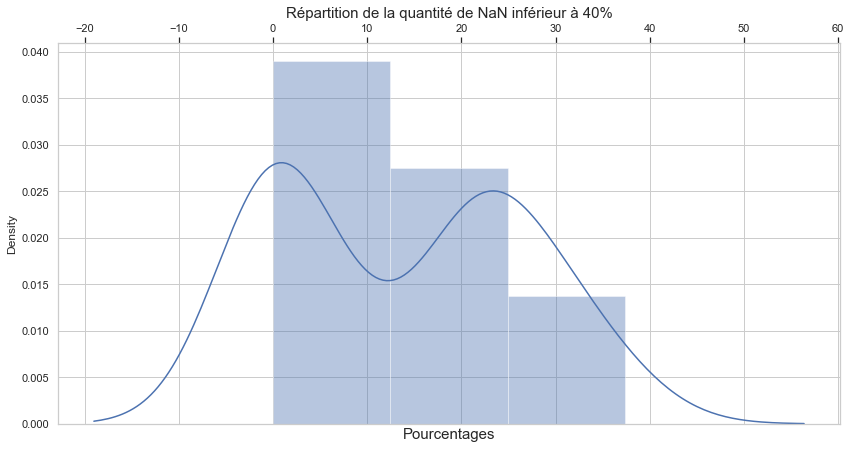

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,7))
ax = sns.distplot(Pourcentage_Valeurs_nulles.values)
ax.xaxis.set_ticks_position('top')
plt.title('Répartition de la quantité de NaN inférieur à 40%', size=15)
plt.xlabel('Pourcentages',size=15)
plt.show()

#### Précision sur le df :

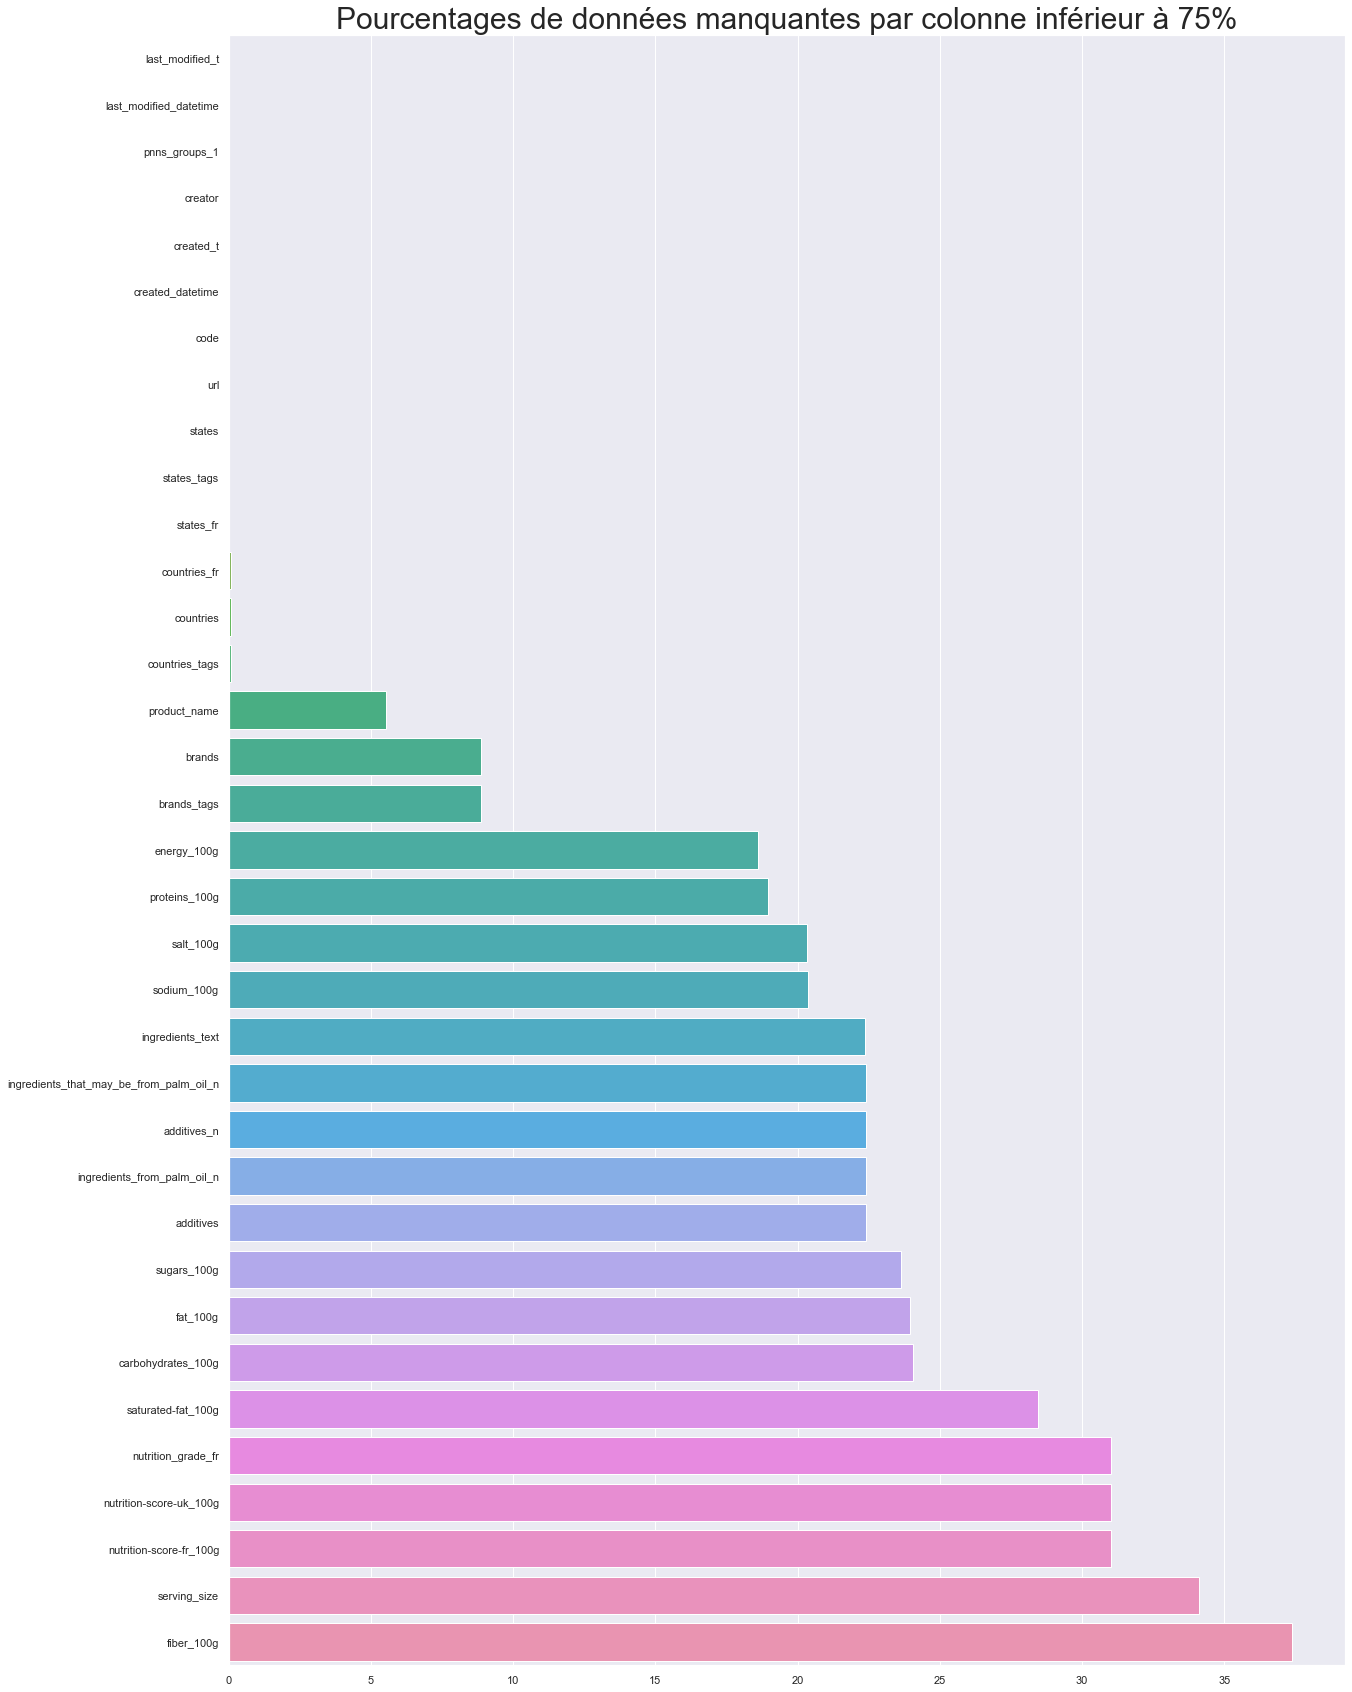

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 30))
ax = sns.barplot(y = Pourcentage_Valeurs_nulles.index, x=Pourcentage_Valeurs_nulles.values)
plt.title('Pourcentages de données manquantes par colonne inférieur à 75%', size=30)
plt.show()

## Suppression d'une partie du DF pour faciliter la visualisation :

Avant de supprimer certaines colonnes il convient de vérifier si elles ne sont pas juste égal à 0.

#### Visu du DF :

In [20]:
Data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Modification des fibres :

In [21]:
# Pour supprimer les NaN des Fibres
Data["fiber_100g"] = Data["fiber_100g"].fillna(0)

Les fibres ne sont pas forcément indiqués, donc si il y a un NaN, cela doit être un 0 dans la trés grande majorité des cas. Cela évitera de supprimer la colonne inutilement.

#### Contrôle des doublons :

In [22]:
print('On peut donc voir qu il y a',Data[Data.duplicated()], 'qui sont duppliqués dans notre DataFrame')

On peut donc voir qu il y a Empty DataFrame
Columns: [code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_fr, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_fr, ingredients_text, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_categ

Aucun doublon n'a été détecter.

On peut voir qu'il y a pas mal de colonnes avec des noms trés similaire, il faudra les supprimer pour la suite.

### Suppression des données manquantes à plus de 40% :

Avec 40% de valeurs manquantes, nous devons donc éliminer les données pour lequel il sera trés difficile d'avoir des infos..

In [23]:
# suppression des colonnes avec plus de 40% de valeurs manquantes :
Data = Data.loc[:, Data.isnull().mean() <.40]
Data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,乐吧,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,knorr,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


#### Visu des colonnes :

In [24]:
Data.columns.unique().tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'states',
 'states_tags',
 'states_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

#### Suppression des colonnes non désirés :

In [25]:
colonnes_suffixes = ['code',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'brands_tags',
 'countries',
 'countries_tags',
 'ingredients_text',
 'serving_size',
 'additives',
 'ingredients_that_may_be_from_palm_oil_n',
 'states',
 'states_tags',
 'states_fr',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sodium_100g',
 'nutrition-score-uk_100g']
Data.drop(colonnes_suffixes, axis=1, inplace=True)

On choisir de garder certaines colonnes tel que additives_n et pnns_groups_1 par exemple pour avoir le nombre d'additifs et le type de produit.

In [26]:
Data

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,http://world-fr.openfoodfacts.org/produit/0000...,Banana Chips Sweetened (Whole),NaN,États-Unis,0.0,0.0,d,Inconnu,2243.0,28.57,14.29,3.6,3.57,0.00000,14.0
2,http://world-fr.openfoodfacts.org/produit/0000...,Peanuts,Torn & Glasser,États-Unis,0.0,0.0,b,Inconnu,1941.0,17.86,17.86,7.1,17.86,0.63500,0.0
3,http://world-fr.openfoodfacts.org/produit/0000...,Organic Salted Nut Mix,Grizzlies,États-Unis,0.0,0.0,d,Inconnu,2540.0,57.14,3.57,7.1,17.86,1.22428,12.0
4,http://world-fr.openfoodfacts.org/produit/0000...,Organic Polenta,Bob's Red Mill,États-Unis,0.0,0.0,NaN,Inconnu,1552.0,1.43,NaN,5.7,8.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,http://world-fr.openfoodfacts.org/produit/9948...,Tomato & ricotta,Panzani,Roumanie,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN
320768,http://world-fr.openfoodfacts.org/produit/9956...,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,États-Unis,0.0,0.0,b,Inconnu,0.0,0.00,0.00,0.0,0.00,0.00000,0.0
320769,http://world-fr.openfoodfacts.org/produit/9970...,乐吧泡菜味薯片,乐吧,Chine,NaN,NaN,NaN,Snacks salé,NaN,NaN,NaN,0.0,NaN,NaN,NaN
320770,http://world-fr.openfoodfacts.org/produit/9980...,Tomates aux Vermicelles,Knorr,France,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [27]:
Data.columns.unique().tolist()

['url',
 'product_name',
 'brands',
 'countries_fr',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'energy_100g',
 'fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

Mes colonnes sont nettoyés, car j'ai gardé les colonnes que je voulais.

#### Suppression des lignes avec trop de données manquantes :

In [28]:
Data.dtypes

url                             object
product_name                    object
brands                          object
countries_fr                    object
additives_n                    float64
ingredients_from_palm_oil_n    float64
nutrition_grade_fr              object
pnns_groups_1                   object
energy_100g                    float64
fat_100g                       float64
sugars_100g                    float64
fiber_100g                     float64
proteins_100g                  float64
salt_100g                      float64
nutrition-score-fr_100g        float64
dtype: object

In [29]:
Data_1 =Data.select_dtypes(include='float64')
print('Le pourcentage de valeurs manquantes pour les float est de',pourcentage_valeurs_manquantes(Data_1),'%')
Data_2 = Data.select_dtypes(include='object')
print('Le pourcentage de valeurs manquantes pour les object est de',pourcentage_valeurs_manquantes(Data_2),'%')
print('Le pourcentage de valeurs manquantes est de',pourcentage_valeurs_manquantes(Data),'%')

Le pourcentage de valeurs manquantes pour les float est de 20.15 %
Le pourcentage de valeurs manquantes pour les object est de 7.59 %
Le pourcentage de valeurs manquantes est de 15.12 %


#### Visu des outliers : 

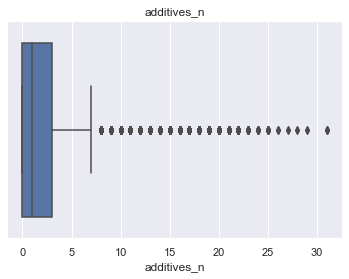

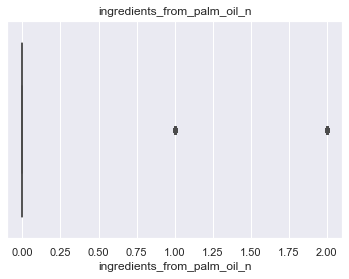

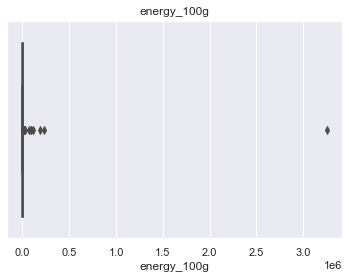

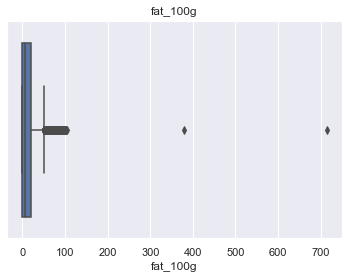

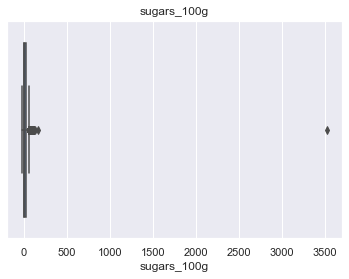

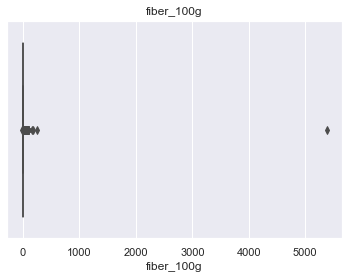

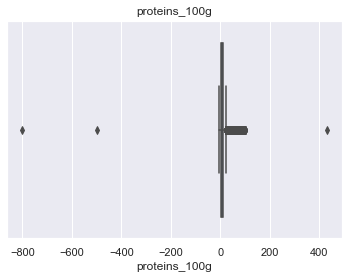

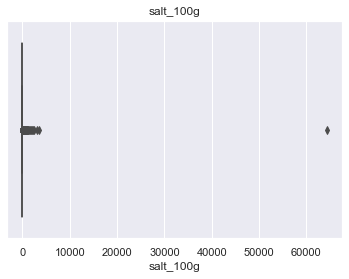

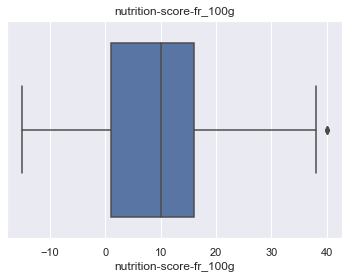

In [30]:
# Vérifiation des données Outliers >100g ou < 0 en utilisant uniquement les données de type float64.
## On utilisera un plotly pour la suite pour avoir une meilleure visibilité des differents quartiles(méthode abandonnée)
### On detecte qu'il y a effectivement des outliers dans ces graphiques.
#### Le nutriscore peut être négatif, ce n'est donc pas forcément un signe d'outlier.

for anomalie in Data.columns:
    if Data[anomalie].dtypes == 'float64':
        sns.boxplot(x=anomalie, data=Data)
        plt.title(anomalie)
        plt.show()

In [31]:
Data.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,248939.000000,248939.000000,2.611130e+05,243891.000000,244971.000000,320772.00000,259922.000000,255510.000000,221210.000000
mean,1.936024,0.019659,1.141915e+03,12.730379,16.003484,1.79242,7.075940,2.028624,9.165535
std,2.502019,0.140524,6.447154e+03,17.578747,22.327284,10.27665,8.409054,128.269454,9.055903
min,0.000000,0.000000,0.000000e+00,0.000000,-17.860000,-6.70000,-800.000000,0.000000,-15.000000
25%,0.000000,0.000000,3.770000e+02,0.000000,1.300000,0.00000,0.700000,0.063500,1.000000
50%,1.000000,0.000000,1.100000e+03,5.000000,5.710000,0.00000,4.760000,0.581660,10.000000
75%,3.000000,0.000000,1.674000e+03,20.000000,24.000000,2.30000,10.000000,1.374140,16.000000
max,31.000000,2.000000,3.251373e+06,714.290000,3520.000000,5380.00000,430.000000,64312.800000,40.000000


On voit qu'il y a des données supérieur à 100g pour les produits limités à 100g et des produits inférieur à 0.

Il y a également des outliers pour l'énergie.

En ce qui concerne le Nutriscore, il peut être positif comme négatif.

In [32]:
# L'énergie se calcul differemment car ce n'est pas en gramme mais en calories, de ce fait on fait le calcul sur une autre boucle.
## Avec les données ci dessus, on va créer une fonction pour épurer avec des données réelles.

In [33]:
"""

Donnees_stables = Data[(Data['sugars_100g'] < 99.0)|
             (Data['sugars_100g'] > 0.0)|
             (Data['energy_100g'] < 900.0)|
             (Data['energy_100g'] > 0.0)|
             (Data['fat_100g'] < 100.0)|
             (Data['fat_100g'] > 0.0)|
             (Data['salt_100g'] < 99.0)|
             (Data['salt_100g'] > 0.0)|
             (Data['fiber_100g'] < 16.0)|
             (Data['fiber_100g'] > 0.0)|
             (Data['proteins_100g'] < 87.6)|
             (Data['proteins_100g'] > 0.0)]
Donnees_stables
"""
# Cette méthode a été abandonner une meilleure a été utiliser

"\n\nDonnees_stables = Data[(Data['sugars_100g'] < 99.0)|\n             (Data['sugars_100g'] > 0.0)|\n             (Data['energy_100g'] < 900.0)|\n             (Data['energy_100g'] > 0.0)|\n             (Data['fat_100g'] < 100.0)|\n             (Data['fat_100g'] > 0.0)|\n             (Data['salt_100g'] < 99.0)|\n             (Data['salt_100g'] > 0.0)|\n             (Data['fiber_100g'] < 16.0)|\n             (Data['fiber_100g'] > 0.0)|\n             (Data['proteins_100g'] < 87.6)|\n             (Data['proteins_100g'] > 0.0)]\nDonnees_stables\n"

##### Visu avant modification des outliers :

<AxesSubplot:>

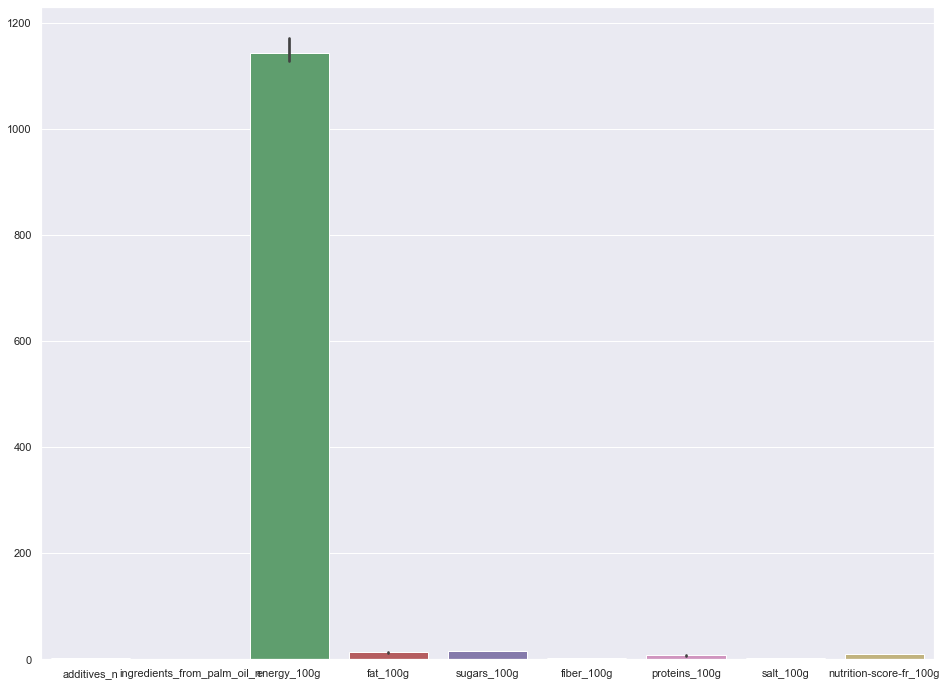

In [34]:
plt.figure(figsize=(16,12))
sns.barplot(data=Data)

In [35]:
### Compris entre 0 et 99g
Données_col = ["sugars_100g","fat_100g","proteins_100g","salt_100g","fiber_100g"]
for k in Données_col :
     visu = Data.loc[(Data[k] < 0) | (Data.select_dtypes(include='float64')[k] > 100)].index.to_list()
     Data.drop(index=visu, inplace=True) 
    
### Compris entre 0 et 900g    
Données_ngie = ["energy_100g"]
for k in Données_ngie :
     visu = Data.loc[(Data[k] < 0) | (Data[k] > 900)].index.to_list()
     Data.drop(index=visu, inplace=True)

##### Visu aprés modification des outliers :

<AxesSubplot:>

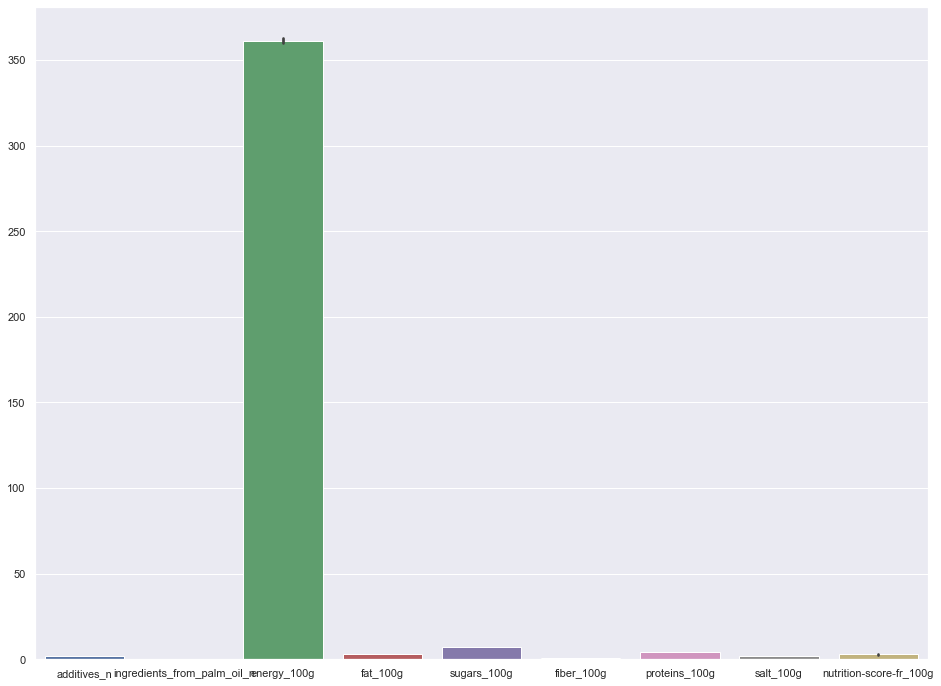

In [36]:
plt.figure(figsize=(16,12))
sns.barplot(data=Data)

In [37]:
Data.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,116093.000000,116093.000000,112920.000000,106038.000000,104149.000000,172575.000000,112563.000000,110598.000000,88616.000000
mean,1.672797,0.007589,361.385291,2.941271,7.062927,0.698068,4.294691,1.972660,2.799472
std,2.247968,0.088063,254.918229,5.162494,9.267416,2.553969,6.356701,8.824051,5.579147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,160.000000,0.000000,0.850000,0.000000,0.000000,0.030480,-1.000000
50%,1.000000,0.000000,310.000000,0.500000,3.600000,0.000000,1.640000,0.320040,2.000000
75%,3.000000,0.000000,552.000000,4.000000,10.470000,0.500000,5.380000,1.100000,5.000000
max,26.000000,2.000000,900.000000,100.000000,100.000000,100.000000,100.000000,100.000000,32.000000


In [38]:
Data['known_energy'] =np.where(Data['energy_100g'] > 0, 1, 0 )
Data['unknown_energy'] =np.where(Data['energy_100g'] < 900, 1, 0 )
Data['Sum_Energy'] = Data['known_energy'] + Data['unknown_energy']

Data['known_fat'] =np.where(Data['fat_100g'] > 0, 1, 0 )
Data['unknown_fat'] =np.where(Data['fat_100g'] < 100, 1, 0 )
Data['Sum_fat'] = Data['known_fat'] + Data['unknown_fat']

Data['known_sugars'] =np.where(Data['sugars_100g'] > 0, 1, 0 )
Data['unknown_sugars'] =np.where(Data['sugars_100g'] < 100, 1, 0 )
Data['Sum_sugars'] = Data['known_sugars'] + Data['unknown_sugars']

Data['known_fiber'] =np.where(Data['fiber_100g'] > 0, 1, 0 )
Data['unknown_fiber'] =np.where(Data['fiber_100g'] < 20, 1, 0 )
Data['Sum_fiber'] = Data['known_fiber'] + Data['unknown_fiber']

Data['known_proteins'] =np.where(Data['proteins_100g'] > 0, 1, 0 )
Data['unknown_proteins'] =np.where(Data['proteins_100g'] < 100, 1, 0 )
Data['Sum_proteins'] = Data['known_proteins'] + Data['unknown_proteins']

Data['known_salt'] =np.where(Data['salt_100g'] > 0, 1, 0 )
Data['unknown_salt'] =np.where(Data['salt_100g'] < 100, 1, 0 )
Data['Sum_salt'] = Data['known_salt'] + Data['unknown_salt']

Data['Known'] = Data['known_energy'] + Data['known_fat'] + Data['known_sugars'] + Data['known_fiber'] + Data['known_proteins'] + Data['known_salt']
DF = Data[Data['Known']== 0]
print(f'Nombres de lignes sans informations : {DF.shape[0]}')

Nombres de lignes sans informations : 62197


In [39]:
Data[((Data['Sum_Energy']== 2)|
             (Data['Sum_fat']== 2)|
             (Data['Sum_sugars']== 2)|
             (Data['Sum_fiber'] == 2)|
             (Data['Sum_proteins']== 2)|
             (Data['Sum_salt']== 2)
            )]
Data = Data.drop(columns=['known_energy','unknown_energy','Sum_Energy','known_fat','unknown_fat','Sum_fat','known_sugars','unknown_sugars','Sum_sugars','known_fiber','unknown_fiber','Sum_fiber','known_proteins','unknown_proteins','Sum_proteins','known_salt','unknown_salt','Sum_salt'])
Data.head(5)

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
0,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
25,http://world-fr.openfoodfacts.org/produit/0000...,Real Salt Granular,Redmond,États-Unis,0.0,0.0,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,96.15678,NaN,1
46,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,NaN,France,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
48,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
52,http://world-fr.openfoodfacts.org/produit/0000...,Organic Small Red Chili Beans,Unfi,États-Unis,0.0,0.0,NaN,Inconnu,699.0,NaN,2.78,44.4,22.22,0.17526,NaN,5


Pour la colonne Known, plus le score est élevé (Entre 1 et 6), plus la connaissance du produit est connu.

## Modification des String :

#### Modification des pays :

In [40]:
# On renomme les pays.
Data.rename(columns ={ 
    
    "en:Etats-unis" : "États-Unis",
    "en:Australie" : "Australie",
    "en:Pays-bas" : "Pays-bas",
    "en:Scotland" : "Ecosse",
    "en:Deutschland" : "Allemagne",
    "en:Spanien" : "Espagne",
    "en:Belgie" : "Belgique",
    "en:Nederland" : "Pays-bas",
    "en:Niederlande" : "Pays-bas",
    "en:United-states-of-america" : "États-Unis",
    "en:Czech" : "République tchèque",
    "en:香港" : "Hong Kong",
    "en:An" : "",
    "Other-العراق" : "Irak",
    "de:Weltweit" : "Mondial",
    "en:Worldwide" : "Mondial",
    "en:Angleterre" : "Royaume-Uni",
    "Union des républiques socialistes soviétiques" : "Russie",
    "en:Deutschland" : "Allemagne",
    "en:Global-market" : "Mondial",
    "en:الإمارات-العربية-المتحدة" : "Émirats arabes unis",
    "en:All-over-the-world" : "Mondial",
    "en:Island" : "",
    "World" : "Mondial",
    "en:Gulf-countries" : "Pays du golfe",
    "en:Turkiye" : "Turquie",
    "en:السعودية" : "Arabie saoudite",
    "Scotland" : "Ecosse",
    "en:Scotland" : "Ecosse",
    "77-provins" : "France",
    "Deutschland" : "Allemagne",
    "Frankreich" : "France",
    "en:whole-milk-yogurts" : "ERREUR",
    "en:stirred-yogurts" : "ERREUR",
    "en:yogurts" : "ERREUR",
    "en:fruit-yogurts" : "ERREUR",
    "en:dairies" : "ERREUR",
    "es:Franciaorszag" : "France",
    "es:Magyarorszag" : "Hongrie",
    "es:Nagy-britannia" : "Royaume-Uni",
    "es:Portugalia" : "Portugal",
    "es:Spanyolorszag" : "Espagne",
    "es:Nemetorszag" : "Allemagne",
    "Magyarorszag" : "Hongrie",
    "Nagy-britannia" : "Royaume-Uni",
    "Svajc" : "Suisse",
    "de:Espagne" : "Espagne",
    "de:Royaume-uni" : "Royaume-uni",
    "Frankrijk" : "France",
    "Aix-en-provence,Bouches-du-rhone,Paca" : "France",
    "Frankreich" : "France",
    "Spanien" : "Espagne",
    "Frankrijk" : "France",
    "en:Belgique" : "Belgique",
    "Belgien" : "Belgique",
    "Bourgogne-aube-nogent-sur-seine" : "France",
    "Niederlande" : "Pays-bas",
    "en:Frankreich" : "France",
    "en:Allemagne" : "Allemagne",
    "Republik-china" : "Chine",
    "en:日本" : "Japon",
    "Other-japon" : "Japon",
    "en:Republique-de-chine" : "Lituanie",
    "en:香港" : "Hong Kong",
    "Other-日本" : "Japon",
    "Union européenne" : "Europe",
    "Cora" : "ERREUR",
    "en:Denemarken" : "Danemark",
    "en:Finand" : "Finlande",
    "en:Frankrijk" : "France",
    "en:Italiaans" : "Italie",
    "en:Zwitserland" : "Suisse",
    "en:Nederland" : "Pays-bas",
    "en:Noorwegen" : "Lituanie",
    "en:Zweden" : "Suède",
    "en:Duitsland" : "Allemagne",
    "Schweiz" : "Suisse",
    "en:Quebec" : "Quebec",
    "en:العراق" : "Irak",
    "en:المملكة-المتحد" : "Royaume-Uni",
    "en:Azərbaycan" : "Azerbaïdjan",
    "en:البحرين" : "Bahreïn",
    "en:Szczecin" : "Pologne",
    "en:تونس" : "Tunisie",
    "en:سلطنة-عمان" : "Oman",
    "Marseille-6" : "France",
    "en:Spanje" : "Espagne",
    "en:Zweden" : "Suède",
    "en:Zwitserland" : "Suisse",
    "Tschechien" : "République tchèque",
    "en:Croacia" : "Croatie",
    "en:Frankrike" : "France",
    "en:Kina" : "Papouasie-Nouvelle-Guinée",
    "xx:Danemark" : "Danemark",
    "en:Sverige" : "Suède",
    "en:Казахстан" : "Kazakhstan",
    "en:भारत" : "Inde",
})

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
0,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
25,http://world-fr.openfoodfacts.org/produit/0000...,Real Salt Granular,Redmond,États-Unis,0.0,0.0,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,96.15678,NaN,1
46,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,NaN,France,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
48,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
52,http://world-fr.openfoodfacts.org/produit/0000...,Organic Small Red Chili Beans,Unfi,États-Unis,0.0,0.0,NaN,Inconnu,699.0,NaN,2.78,44.4,22.22,0.17526,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320766,http://world-fr.openfoodfacts.org/produit/9941...,NaN,NaN,Royaume-Uni,NaN,NaN,NaN,Snacks salé,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
320767,http://world-fr.openfoodfacts.org/produit/9948...,Tomato & ricotta,Panzani,Roumanie,NaN,NaN,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
320768,http://world-fr.openfoodfacts.org/produit/9956...,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,États-Unis,0.0,0.0,b,Inconnu,0.0,0.0,0.00,0.0,0.00,0.00000,0.0,0
320769,http://world-fr.openfoodfacts.org/produit/9970...,乐吧泡菜味薯片,乐吧,Chine,NaN,NaN,NaN,Snacks salé,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


## Modification des données avant Analyse :

#### Vérif des données manquantes :

In [41]:
Data_1 =Data.select_dtypes(include='float64')
print('Le pourcentage de valeurs manquantes pour les float est de',pourcentage_valeurs_manquantes(Data_1),'%')
Data_2 = Data.select_dtypes(include='object')
print('Le pourcentage de valeurs manquantes pour les object est de',pourcentage_valeurs_manquantes(Data_2),'%')
print('Le pourcentage de valeurs manquantes est de',pourcentage_valeurs_manquantes(Data),'%')

Le pourcentage de valeurs manquantes pour les float est de 33.06 %
Le pourcentage de valeurs manquantes pour les object est de 12.08 %
Le pourcentage de valeurs manquantes est de 23.13 %


#### Détection et suppression de produit sans référence : 

In [42]:
print(f'Le nombre de produits sans référence est de', Data.product_name.isna().sum(),'.')

Le nombre de produits sans référence est de 15790 .


In [43]:
Data = Data[Data['product_name'].isna()== False]

####  Détection et suppression des additifs non communiqués :

In [44]:
print(f'Le nombre de produits sans référence est de', Data.additives_n.isna().sum(),'.')

Le nombre de produits sans référence est de 41621 .


In [45]:
Data = Data[Data['additives_n'].isna()== False]

#### Détection et suppression des marques sans référence : 

In [46]:
print(f'Le nombre de marques sans référence est de', Data.brands.isna().sum(),'.')

Le nombre de marques sans référence est de 1499 .


In [47]:
Data = Data[Data['brands'].isna()== False]

Toutes les données non renseignés :

In [48]:
print(f'Le nombre de lignes qui a été supprimés car non renseignés est de', int(41621+15790+1499),'.')

Le nombre de lignes qui a été supprimés car non renseignés est de 58910 .


In [49]:
Data[Data.duplicated() == True]

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known


In [50]:
# Si il faut mettre les données en Maj
#Data['brands'] = Data.brands.str.upper()

In [51]:
Data
# Données à potentiellement modifié

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
25,http://world-fr.openfoodfacts.org/produit/0000...,Real Salt Granular,Redmond,États-Unis,0.0,0.0,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,96.15678,NaN,1
52,http://world-fr.openfoodfacts.org/produit/0000...,Organic Small Red Chili Beans,Unfi,États-Unis,0.0,0.0,NaN,Inconnu,699.0,NaN,2.78,44.4,22.22,0.17526,NaN,5
71,http://world-fr.openfoodfacts.org/produit/0000...,Fine Sea Salt,Unfi,États-Unis,0.0,0.0,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,99.90582,NaN,1
97,http://world-fr.openfoodfacts.org/produit/0000...,Liquid Aminos,Bragg,États-Unis,0.0,0.0,NaN,Inconnu,NaN,NaN,NaN,0.0,11.60,11.17600,NaN,2
99,http://world-fr.openfoodfacts.org/produit/0000...,Organic Shoyu,San J,États-Unis,1.0,0.0,NaN,Inconnu,234.0,NaN,NaN,0.0,11.11,13.54582,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320753,http://world-fr.openfoodfacts.org/produit/9871...,Lager,Carib,NaN,0.0,0.0,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
320758,http://world-fr.openfoodfacts.org/produit/9900...,Miel de Camargue,L. Boulaire,France,0.0,0.0,NaN,Snacks sucré,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
320763,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,Lobodis,France,0.0,0.0,c,Boissons,21.0,0.2,0.50,0.2,0.50,0.02540,2.0,6
320765,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,"Sans marque,D.Lambert",France,0.0,0.0,NaN,"Poissons,Viandes et Oeufs",NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [52]:
Data_test_test =Data[Data['Known'] > 1]

In [53]:
Data_test_test

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
52,http://world-fr.openfoodfacts.org/produit/0000...,Organic Small Red Chili Beans,Unfi,États-Unis,0.0,0.0,NaN,Inconnu,699.0,NaN,2.78,44.4,22.22,0.17526,NaN,5
97,http://world-fr.openfoodfacts.org/produit/0000...,Liquid Aminos,Bragg,États-Unis,0.0,0.0,NaN,Inconnu,NaN,NaN,NaN,0.0,11.60,11.17600,NaN,2
99,http://world-fr.openfoodfacts.org/produit/0000...,Organic Shoyu,San J,États-Unis,1.0,0.0,NaN,Inconnu,234.0,NaN,NaN,0.0,11.11,13.54582,NaN,3
100,http://world-fr.openfoodfacts.org/produit/0000...,Organic Wheat-Free Tamari,San J,États-Unis,1.0,0.0,NaN,Inconnu,234.0,NaN,NaN,0.0,11.11,13.26388,NaN,3
124,http://world-fr.openfoodfacts.org/produit/0000...,Organic Wheat Bran,Guistos,États-Unis,0.0,0.0,NaN,Inconnu,837.0,3.33,NaN,40.0,13.33,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320683,http://world-fr.openfoodfacts.org/produit/9606...,tuna chunks in spring water,princes,Royaume-Uni,0.0,0.0,a,"Poissons,Viandes et Oeufs",444.0,0.50,0.00,0.0,25.00,0.76200,-1.0,4
320686,http://world-fr.openfoodfacts.org/produit/9608...,"Haywards, Baby Beetroot",Mizkan Euro Ltd.,États-Unis,0.0,0.0,NaN,Inconnu,866.0,0.50,NaN,1.5,0.90,NaN,NaN,4
320693,http://world-fr.openfoodfacts.org/produit/9609...,Santa Cruz Chilli & Lime Dressing,Newman's Own,Royaume-Uni,1.0,0.0,c,Produits gras et Sauces,660.0,6.90,16.70,0.6,0.30,0.54102,6.0,6
320750,http://world-fr.openfoodfacts.org/produit/9836...,Raspados Ice Bars,"Jarritos, The Jel Sert Company",États-Unis,8.0,0.0,NaN,Inconnu,368.0,0.00,19.30,0.0,0.00,0.04572,NaN,3


### Suppression des doublons pour les marques :

Pour vérifier on prends la sauce Activia Greek Vanilla pour vérifier.

In [54]:
DF_2 = Data[Data['brands'].str.contains('Dannon')]
DF_2[DF_2['product_name'].str.contains('Activia Greek Vanilla')]

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
248292,http://world-fr.openfoodfacts.org/produit/3630...,Activia Greek Vanilla,"Activia,Dannon,Danone",États-Unis,3.0,0.0,b,Produits Laitiers,391.0,0.0,14.0,0.0,8.0,0.0847,0.0,4


In [55]:
DF_3 = Data[Data['brands'].str.contains('Dannon,  The Dannon Company  Inc.')]
DF_3[DF_3['product_name'].str.contains('Activia Greek Vanilla')]

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known


In [56]:
DF_4 = Data[Data['brands'].str.contains('Danone')]
DF_4[DF_4['product_name'].str.contains('Activia Greek Vanilla')]

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
248292,http://world-fr.openfoodfacts.org/produit/3630...,Activia Greek Vanilla,"Activia,Dannon,Danone",États-Unis,3.0,0.0,b,Produits Laitiers,391.0,0.0,14.0,0.0,8.0,0.0847,0.0,4


In [57]:
DF_5 = Data[Data['brands'].str.contains('Danone')]
DF_5.brands.unique()
#DF_3[DF_3['product_name'].str.contains('Activia Greek Vanilla')]

array(['Danone,  The Dannon Company  Inc.', 'Dannon,  The Danone Group',
       'Danone,Silhouette', 'Bonafont,Danone',
       'Evian, Danone Waters Of America  Inc.', 'Danone',
       'Vivaris,//Propiedad de://,Aguas Font Vella y Lanjarón S.A.,//Perteneciente a://,Groupe Danone S.A.',
       'Font Vella,//Propiedad de://,Aguas Font Vella y Lanjarón S.A.,//Perteneciente a://,Groupe Danone S.A.',
       'Blédina,Danone', 'Danone,Activia', 'Gervais,Danone',
       'Danone,Jockey', 'Danone,Actimel', 'Danone,Danette',
       'Danone,Velouté', 'Danette,Danone', 'Danone,Gervais',
       'Actimel,Danone', 'Danone,Taillefine', 'Ilios,Danone',
       'Activia,Danone', 'Danone,Danacol', 'Danone,Gervita',
       'Taillefine,Danone', 'Danone,Danio', 'Danone,Dany',
       'Danone,Danette,Le Liégeois', 'Danone,Danette,Le liégeois',
       'blédina,Blédilait,Danone', 'blédina,Jacquemaire,Danone',
       'Blédina,Danone,Mon 1er petit pot', 'Blédina,Blédichef,Danone',
       'Blédina,Mon 1er petit pot,

### Création de Brands_groups :

#### Affichage des marques ayant uniquement 50 produits :

In [58]:
Brands_groups = Data.groupby('brands').count()

In [59]:
Brands_groups[Brands_groups.product_name > 50].index.unique().tolist()
## Renommer pour faire des regroupements

['365 Everyday Value',
 '365 Everyday Value,  Whole Foods Market  Inc.',
 'Ahold',
 'Aldi-Benner Company',
 'Alipende,//Propiedad de://,AhorraMas S.A.',
 'Alnatura',
 'Amora',
 "Amy's",
 "Amy's,  Amy's Kitchen Inc.",
 'Andros',
 "Anna's Best,Migros",
 'Archer Farms',
 'Archer Farms,  Target Stores',
 'Arizona,  Ferolito Vultaggio & Sons',
 'Asda',
 'Auchan',
 "Auchan,L'oiseau,Auchan Production,Groupe Auchan",
 'B&G',
 'Badia',
 'Barilla',
 'Beech-Nut',
 'Bell-View',
 'Belle France',
 'Big Y',
 'Big Y,  Big Y Foods  Inc.',
 'Bio Village,Marque Repère',
 'Birds Eye',
 'Bjorg',
 'Blue Bunny,  Wells Enterprises  Inc.',
 'Bonduelle',
 'Bonne Maman',
 'Bonneterre',
 'Breyers,  Unilever',
 "Brookshire's",
 'Bumble Bee',
 "Bush's Best",
 'Butterball,  Butterball  Llc',
 'Cadia',
 'Carrefour',
 'Carrefour,//Propiedad de://,Carrefour S.A.',
 'Carrefour,CMI (Carrefour Marchandises Internationales),Groupe Carrefour',
 'Casino',
 'Casino,Groupe Casino',
 'Cento',
 'Centrella',
 'Charal',
 'Charles 

Au vu des doublons sur les marques il faut faire un replace :

In [60]:
# On renomme les marques.
Data = Data.replace({ 
    
    "365 Everyday Value,  Whole Foods Market  Inc." : "Whole Foods Market",
    "365 Everyday Value" : "Whole Foods Market",
    "Dannon" : "Danone",
    "Dannon,  The Dannon Company  Inc." : "Danone",
    "Food Club,  Topco Associates  Inc." : "Food Club",
    "Food Lion,  Food Town Stores Inc." : "Food Lion",
    "Giant Eagle,  Giant Eagle  Inc." : "Giant Eagle",
    "Great Value,  Wal-Mart Stores  Inc." : "Great Value",
    "Hannaford,  Hannaford Bros. Co." : "Hannaford",
    "Harris Teeter,  Harris-Teeter Inc." : "Harris Teeter",
    "Kroger,  The Kroger Co." : "Kroger",
    "Market Pantry,  Target Stores" : "Market Pantry",
    "Meijer,  Meijer  Inc." : "Meijer",
    "Meijer  Inc." : "Meijer",
    "Shoprite,  Wakefern Food Corporation" : "Shoprite",
    "Weis Markets  Inc." : "Weis",
    "Weis Quality" : "Weis",
    "Casino" : "Groupe Casino",
    "Franprix" : "Leader price",
    "Food Town Stores Inc." : "Food Lion",
    "Great Value,  Wal-Mart Stores  Inc." : "Great Value",
    "Private Selection" : "The Kroger Co.",
    "Signature Kitchens" : "Safeway  Inc.",
    "Hacendado,//Propiedad de://,Mercadona S.A." :"Hacendado",
    "Blue Bunny,  Wells Enterprises  Inc." : "Wells",
    "Blue Bunny" : "Wells",
    "Ocean Spray,  Ocean Spray Cranberries  Inc.": "Ocean Spray",
    "Big Y,  Big Y Foods  Inc." :"Big Y",
    "Carrefour,//Propiedad de://,Carrefour S.A." : "Carrefour",
    "Carrefour,CMI (Carrefour Marchandises Internationales),Groupe Carrefour": "Carrefour",
    "Casino,Groupe Casino'" :"Groupe Casino",
    "Carrefour,//Propiedad de://,Carrefour S.A." : "Carrefour",
    "Del Monte Quality,  Del Monte Foods": "Del Monte", 
    "Essential Everyday,  Supervalu  Inc." :"Supervalu  Inc.",
    "Evolution Fresh,  Evolution Fresh  Inc." : "Evolution Fresh",
    "Fresh & Easy  Llc": "Fresh & Easy",
    "Giant Eagle  Inc." :"Giant Eagle",
    "Goya,  Goya Foods  Inc." : "Goya",
    "Hannaford Bros. Co.": "Hannaford",
    "Harris-Teeter Inc." :"Harris Teeter",
    "Hormel,  Hormel Foods Corporation" : "Hormel",
    "Hy-Vee  Inc.": "Hy-Vee",
    "Hy-Vee,  Hy-Vee  Inc." :"Hy-Vee",
    "Knorr,Unilever" : "Knorr",
    "Leader Price" : "Groupe Casino",
    "Leader price" : "Groupe Casino",
    "Leader Price,DLP (Distribution Leader Price),Groupe Casino'": "Groupe Casino",
    "Lipton,  Unilever": "Lipton",
    "Mccormick,  Mccormick & Co.  Inc." :"Mccormick",
    "Silk,  Wwf Operating Companyn" : "Silk",
    "Simply Balanced,  Target Stores": "Simply Balanced",
    "The Dannon Company  Inc." :"Danone",
    "The Kroger Co." : "Kroger",
    "Wegmans,  Wegmans Food Markets  Inc." : "Wegmans",
    "Weis Quality,  Weis Markets  Inc.": "Weis",
    "Welch's,  Welch Foods Inc": "Welch's",
    "Whole Foods Market,  Bread & Circus Inc." :"Whole Foods Market",
    "Whole Foods Market,  Harry's Farmers Market  Ltd." : "Whole Foods Market",
    "Whole Foods Market,  Whole Foods Market  Inc.": "Whole Foods Market",
    "Winn-Dixie": "Winn Dixie",
    'Silk,  Wwf Operating Company' :"Whole Foods Market",
    'Sans marque' :"sans marque",
    'Publix,  Publix Super Markets  Inc.' :"Publix",
    'Pacific,  Pacific Foods Of Oregon  Inc.' :"Pacific",
    'Leader Price,DLP (Distribution Leader Price),Groupe Casino' :"Groupe Casino",
    "Auchan,L'oiseau,Auchan Production,Groupe Auchan" :"Auchan",
    'Archer Farms,  Target Stores' :"Archer Farms",
    "Amy's,  Amy's Kitchen Inc." :"Amy's",
    
})

In [61]:
Brands_groups = Data.groupby('brands').count()

In [62]:
Brands_groups[Brands_groups.product_name > 50].index.unique().tolist()
## Renommer pour faire des regroupements
#### 415 -> 20 650 -> 10
### Simplifier l'analyse sur ça en ne prenant que les marques avec 415 produits.

['Ahold',
 'Aldi-Benner Company',
 'Alipende,//Propiedad de://,AhorraMas S.A.',
 'Alnatura',
 'Amora',
 "Amy's",
 'Andros',
 "Anna's Best,Migros",
 'Archer Farms',
 'Arizona,  Ferolito Vultaggio & Sons',
 'Asda',
 'Auchan',
 'B&G',
 'Badia',
 'Barilla',
 'Beech-Nut',
 'Bell-View',
 'Belle France',
 'Big Y',
 'Bio Village,Marque Repère',
 'Birds Eye',
 'Bjorg',
 'Bonduelle',
 'Bonne Maman',
 'Bonneterre',
 'Breyers,  Unilever',
 "Brookshire's",
 'Bumble Bee',
 "Bush's Best",
 'Butterball,  Butterball  Llc',
 'Cadia',
 'Carrefour',
 'Casino,Groupe Casino',
 'Cento',
 'Centrella',
 'Charal',
 'Charles & Alice',
 'Chicken Of The Sea',
 'Chobani',
 'Clover Valley',
 'Coca-Cola',
 'Coles',
 'Coop',
 'Cora',
 'Daily Chef',
 'Danival',
 'Danone',
 'Darigold',
 'Dean Foods Company',
 "Dean's",
 'Del Monte',
 'Delallo',
 'Dia',
 'Dole',
 'Ducros',
 'Délisse,Marque Repère',
 "Earth's Best",
 'Earthbound Farm',
 'Essential Everyday',
 'Evolution Fresh',
 'Fage',
 'Family Gourmet',
 'Findus',
 'Fle

On peut donc conclure que le nom du produit et le même, que la marque est 'differente', car les caractéres sont differents, mais ce sont bien des doublons.

On a la confirmation en comparant avec les données types énergie, sucre etc etc..

Il faut donc renommer les marques pour ensuite faire un .duplicated()

In [63]:
Liste_marques =['365 Everyday Value',
 'Ahold',
 'Aldi-Benner Company',
 'Alipende,//Propiedad de://,AhorraMas S.A.',
 'Alnatura',
 'Amora',
 "Amy's",
 'Andros',
 "Anna's Best,Migros",
 'Archer Farms',
 'Arizona,  Ferolito Vultaggio & Sons',
 'Asda',
 'Auchan',
 'B&G',
 'Badia',
 'Barilla',
 'Beech-Nut',
 'Bell-View',
 'Belle France',
 'Big Y',
 'Bio Village,Marque Repère',
 'Birds Eye',
 'Bjorg',
 'Blue Bunny',
 'Bonduelle',
 'Bonne Maman',
 'Bonneterre',
 'Breyers,  Unilever',
 "Brookshire's",
 'Bumble Bee',
 "Bush's Best",
 'Butterball,  Butterball  Llc',
 'Cadia',
 'Carrefour',
 'Casino,Groupe Casino',
 'Cento',
 'Centrella',
 'Charal',
 'Charles & Alice',
 'Chicken Of The Sea',
 'Chobani',
 'Clover Valley',
 'Coca-Cola',
 'Coles',
 'Coop',
 'Cora',
 'Daily Chef',
 'Danival',
 'Danone',
 'Darigold',
 'Dean Foods Company',
 "Dean's",
 'Del Monte',
 'Delallo',
 'Dia',
 'Dole',
 'Ducros',
 'Délisse,Marque Repère',
 "Earth's Best",
 'Earthbound Farm',
 'Essential Everyday',
 'Evolution Fresh',
 'Fage',
 'Family Gourmet',
 'Findus',
 'Fleury Michon',
 'Food Club',
 'Food Lion',
 'Fresh & Easy',
 'Fresh Finds',
 'Fresh Foods Market',
 'Full Circle',
 'Giant',
 'Giant Eagle',
 'Goya',
 'Grace',
 'Great Value',
 'Groupe Casino',
 'Gut & Günstig',
 'H-E-B',
 'Hacendado',
 'Haggen',
 'Hannaford',
 'Hanover',
 'Harris Teeter',
 'Heinz',
 'Hipp',
 'Hood,  Hp Hood Llc',
 'Hormel',
 'Ht Traders',
 'Hy-Vee',
 'Iga',
 'Jell-O',
 'Jennie-O,  Jennie-O Turkey Store  Inc.',
 'Kemps,  Kemps Llc',
 'Key Food',
 'Kikkoman,  Kikkoman Sales Usa  Inc.',
 'Kings',
 'Knorr',
 'Kool-Aid',
 'Kroger',
 'La Criolla',
 'La Fe',
 'La Preferida',
 'La Vie Claire',
 'Labeyrie',
 'Lala,  Borden Dairy Company',
 'Langers,  Langer Juice Company  Inc.',
 'Laura Lynn',
 'Le Gaulois',
 'Leader Price',
 'Liebig',
 'Lipton',
 'Lowes Foods',
 'Lucien Georgelin',
 'M Classic',
 'Margaret Holmes',
 'Marie',
 'Market Pantry',
 'Marketside',
 'Marks & Spencer',
 'Materne',
 'Mccormick',
 'Meijer',
 "Michelina's,  Bellisio Foods  Inc.",
 'Migros',
 'Milbona',
 'Monique Ranou',
 'Monoprix',
 'Monster Energy Company',
 'Morrisons',
 'Morton & Bassett Spices',
 'Mt. Olive',
 'My Essentials',
 "Nature's Promise",
 'Nestlé',
 'Netto',
 'Notre Jardin,Marque Repère',
 'O Organics',
 'Ocean Spray',
 'Old Orchard,  Old Orchard Brands Llc.',
 'Open Nature',
 'Pacific',
 'Panzani',
 "Papa John's Salads & Produce",
 'Picard',
 'Polar Corporation',
 'Price Chopper',
 'Publix',
 "Raley's",
 'Reflets de France',
 'Refreshe,  Safeway  Inc.',
 'Renaissance Food Group',
 'Roland',
 "Roundy's",
 'Safeway  Inc.',
 "Sainsbury's,by sainsbury's",
 'Saint Eloi',
 "Sam's Choice",
 'Saupiquet',
 'Schnucks',
 'Schweppes',
 'Shasta,  Shasta Beverages',
 'Shoprite',
 'Shurfine',
 'Signature',
 'Silk',
 'Simple Truth Organic',
 'Simply Balanced',
 "Simply Roundy's",
 'Sin marca',
 'Smart Ones',
 'So Delicious Dairy Free',
 'Sojasun',
 'Southern Home',
 'Spartan',
 'Springfield',
 'Sprout',
 'Starkist',
 'Stater Bros',
 'Stonyfield Organic',
 'Suja,  Suja Life  Llc',
 'Super Chill,  Supervalu  Inc.',
 'Supervalu  Inc.',
 'Target Stores',
 'Taste Of Inspirations',
 'Taylor Farms',
 'Tesco',
 'The Hain Celestial Group  Inc.',
 'The Moran Group Incorporated',
 'The Pictsweet Company',
 'Tillamook',
 'Topco Associates  Inc.',
 'Tops',
 "Trader Joe's",
 'Tropicana',
 'Turkey Hill',
 'U',
 'Unilever',
 'Valu Time',
 'Victoria',
 'Vlasic',
 'Wal-Mart Stores  Inc.',
 'Wegmans',
 'Weis',
 "Welch's",
 'Wellsley Farms',
 'Western Family',
 'Whole Foods Market',
 'Wild Harvest',
 'William Saurin',
 'Winco Foods',
 'Winn Dixie',
 'Winny',
 'Yoplait',
 'Zapetti',
 "d'aucy",
 'sans marque'
               ]

In [64]:
Data = Data[Data['brands'].isin(Liste_marques)]
Data

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
236,http://world-fr.openfoodfacts.org/produit/0000...,Cauliflower,"Sainsbury's,by sainsbury's",Royaume-Uni,0.0,0.0,NaN,Fruits et Légumes,144.0,0.90,2.50,1.8,3.60,0.00000,NaN,5
259,http://world-fr.openfoodfacts.org/produit/0000...,Spring Onions,"Sainsbury's,by sainsbury's",Royaume-Uni,0.0,0.0,NaN,Fruits et Légumes,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
281,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,5.0,0.0,NaN,Inconnu,598.0,0.00,25.00,0.0,0.00,1.63322,NaN,3
328,http://world-fr.openfoodfacts.org/produit/0000...,Cornichons,Trader Joe's,États-Unis,0.0,0.0,NaN,Inconnu,75.0,0.00,NaN,0.0,0.00,3.08356,NaN,2
429,http://world-fr.openfoodfacts.org/produit/0001...,Diced In Tomato Juice,Trader Joe's,États-Unis,2.0,0.0,b,Inconnu,79.0,0.00,3.08,0.8,0.77,0.56642,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320267,http://world-fr.openfoodfacts.org/produit/9348...,Blended Nonfat Yogurt,Welch's,États-Unis,2.0,0.0,b,Inconnu,297.0,0.00,11.76,0.0,2.94,0.12700,1.0,4
320268,http://world-fr.openfoodfacts.org/produit/9348...,Blended Nonfat Yogurt,Welch's,États-Unis,2.0,0.0,b,Inconnu,297.0,0.00,10.59,0.0,2.94,0.12700,1.0,4
320317,http://world-fr.openfoodfacts.org/produit/9376...,"Eatwell, Butternut Squash Pasta Sauce",Fresh & Easy,États-Unis,1.0,0.0,c,Inconnu,280.0,2.08,4.17,0.0,0.83,0.50800,3.0,5
320668,http://world-fr.openfoodfacts.org/produit/9577...,100% Pur Jus 4 agrumes,Cora,France,0.0,0.0,c,Boissons,192.0,0.50,9.20,0.6,0.60,0.03000,4.0,6


In [65]:
Data_365 = Data[Data['brands'] =='365 Everyday Value'].duplicated(subset=['additives_n','ingredients_from_palm_oil_n','nutrition_grade_fr','energy_100g','fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g'],keep= False)
# on peut voir qu'il y a des redondances de marques.
Data_365= Data.loc[Data_365[Data_365 > 0].index ,:]
Data_365

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known


In [66]:
Data_Alnatura = Data[Data['brands'] =='Ahold'].duplicated(subset=['additives_n','ingredients_from_palm_oil_n','nutrition_grade_fr','energy_100g','fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g'],keep= False)
# on peut voir qu'il y a des redondances de marques.
Data_Alnatura = Data.loc[Data_Alnatura[Data_Alnatura > 0].index ,:]
Data_Alnatura

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
113961,http://world-fr.openfoodfacts.org/produit/0239...,Boneless Ham,Ahold,États-Unis,3.0,0.0,d,Inconnu,498.0,2.98,5.95,0.0,14.29,3.74904,12.0,5
114279,http://world-fr.openfoodfacts.org/produit/0273...,Boneless Ham,Ahold,États-Unis,3.0,0.0,d,Inconnu,498.0,2.98,5.95,0.0,14.29,3.74904,12.0,5
124557,http://world-fr.openfoodfacts.org/produit/0688...,Original Seltzer,Ahold,États-Unis,0.0,0.0,NaN,Inconnu,0.0,0.00,NaN,0.0,0.00,0.00000,NaN,0
124558,http://world-fr.openfoodfacts.org/produit/0688...,Seltzer Water,Ahold,États-Unis,0.0,0.0,NaN,Inconnu,0.0,0.00,NaN,0.0,0.00,0.00000,NaN,0
124560,http://world-fr.openfoodfacts.org/produit/0688...,Seltzer Water,Ahold,États-Unis,0.0,0.0,NaN,Inconnu,0.0,0.00,NaN,0.0,0.00,0.00508,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284162,http://world-fr.openfoodfacts.org/produit/6882...,Apple Cider Vinegar,Ahold,États-Unis,0.0,0.0,b,Inconnu,0.0,0.00,0.00,0.0,0.00,0.00000,0.0,0
284175,http://world-fr.openfoodfacts.org/produit/6882...,Flavored Seltzer Water,Ahold,États-Unis,0.0,0.0,NaN,Inconnu,0.0,0.00,NaN,0.0,0.00,0.00000,NaN,0
284179,http://world-fr.openfoodfacts.org/produit/6882...,Holiday Spice Cider,Ahold,États-Unis,1.0,0.0,NaN,Inconnu,209.0,0.00,12.50,0.0,0.00,0.06350,NaN,3
284183,http://world-fr.openfoodfacts.org/produit/6882...,Premium Spiced Apple Cider,Ahold,États-Unis,1.0,0.0,NaN,Inconnu,209.0,0.00,12.50,0.0,0.00,0.06350,NaN,3


On peut donc voir qu'il y a des doublons dans les marques vis à vis des product_name, il faudra donc les supprimer.

### Suppression des doublons pour product_name :

On va utiliser la méthode drop_duplicates pour commencer.

In [67]:
Data_doublon = Data.drop_duplicates()
Data_doublon= Data_doublon.reset_index(drop=True)
print(f"Nombre de données restantes après la suppression sous drop_duplicates(): {Data_doublon.shape[0]}")

Nombre de données restantes après la suppression sous drop_duplicates(): 36664


On va utiliser qui est relativement bien consommé pour contrôler les doublons :

In [68]:
display(Data_doublon[Data_doublon["product_name"] == "Jus de pomme"])
print(f"Nombre de product_name est Jus de pomme: {Data_doublon[Data_doublon['product_name'] == 'Jus de pomme'].shape[0]}")

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
24989,http://world-fr.openfoodfacts.org/produit/2000...,Jus de pomme,Auchan,France,0.0,0.0,NaN,Boissons,187.0,0.0,NaN,0.0,0.0,NaN,NaN,1
31430,http://world-fr.openfoodfacts.org/produit/3350...,Jus de pomme,Monoprix,France,0.0,0.0,c,Boissons,171.0,0.1,9.5,0.1,0.1,0.0254,3.0,6
33394,http://world-fr.openfoodfacts.org/produit/3596...,Jus de pomme,Auchan,France,0.0,0.0,NaN,Boissons,187.0,0.0,NaN,0.0,0.0,NaN,NaN,1
35144,http://world-fr.openfoodfacts.org/produit/7610...,Jus de pomme,Coop,Suisse,0.0,0.0,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
35146,http://world-fr.openfoodfacts.org/produit/7610...,Jus de pomme,Coop,Suisse,0.0,0.0,c,Boissons,190.0,0.0,11.0,0.0,0.0,0.0000,5.0,2
35612,http://world-fr.openfoodfacts.org/produit/7616...,Jus de pomme,M Classic,Suisse,0.0,0.0,NaN,Inconnu,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


Nombre de product_name est Jus de pomme: 6


On a une confirmation des doublons ici pour la marque Auchan -> Jus de Pomme.

In [69]:
Data_sans_doublon = Data_doublon.drop_duplicates(subset = ['additives_n','ingredients_from_palm_oil_n','nutrition_grade_fr','energy_100g','fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g'])
Data_sans_doublon = Data_sans_doublon.reset_index(drop=True)
print(f"Nombre de doublons dans le DF : {Data_doublon[Data_doublon.duplicated(subset = ['additives_n','ingredients_from_palm_oil_n','nutrition_grade_fr','energy_100g','fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g']) == True].shape[0]}")
print(f"Nombre de données restantes après la suppression des doublons : {Data_sans_doublon.shape[0]}")
display(Data_sans_doublon.head())

Nombre de doublons dans le DF : 13180
Nombre de données restantes après la suppression des doublons : 23484


,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
0,http://world-fr.openfoodfacts.org/produit/0000...,Cauliflower,"Sainsbury's,by sainsbury's",Royaume-Uni,0.0,0.0,NaN,Fruits et Légumes,144.0,0.9,2.50,1.8,3.60,0.00000,NaN,5
1,http://world-fr.openfoodfacts.org/produit/0000...,Spring Onions,"Sainsbury's,by sainsbury's",Royaume-Uni,0.0,0.0,NaN,Fruits et Légumes,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,5.0,0.0,NaN,Inconnu,598.0,0.0,25.00,0.0,0.00,1.63322,NaN,3
3,http://world-fr.openfoodfacts.org/produit/0000...,Cornichons,Trader Joe's,États-Unis,0.0,0.0,NaN,Inconnu,75.0,0.0,NaN,0.0,0.00,3.08356,NaN,2
4,http://world-fr.openfoodfacts.org/produit/0001...,Diced In Tomato Juice,Trader Joe's,États-Unis,2.0,0.0,b,Inconnu,79.0,0.0,3.08,0.8,0.77,0.56642,1.0,5


In [70]:
Data_sans_doublon

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
0,http://world-fr.openfoodfacts.org/produit/0000...,Cauliflower,"Sainsbury's,by sainsbury's",Royaume-Uni,0.0,0.0,NaN,Fruits et Légumes,144.0,0.90,2.50,1.8,3.60,0.00000,NaN,5
1,http://world-fr.openfoodfacts.org/produit/0000...,Spring Onions,"Sainsbury's,by sainsbury's",Royaume-Uni,0.0,0.0,NaN,Fruits et Légumes,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,5.0,0.0,NaN,Inconnu,598.0,0.00,25.00,0.0,0.00,1.63322,NaN,3
3,http://world-fr.openfoodfacts.org/produit/0000...,Cornichons,Trader Joe's,États-Unis,0.0,0.0,NaN,Inconnu,75.0,0.00,NaN,0.0,0.00,3.08356,NaN,2
4,http://world-fr.openfoodfacts.org/produit/0001...,Diced In Tomato Juice,Trader Joe's,États-Unis,2.0,0.0,b,Inconnu,79.0,0.00,3.08,0.8,0.77,0.56642,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,http://world-fr.openfoodfacts.org/produit/9348...,Greek Nonfat Yogurt,Welch's,États-Unis,0.0,0.0,a,Inconnu,305.0,0.00,8.67,0.0,8.67,0.07620,-4.0,4
23480,http://world-fr.openfoodfacts.org/produit/9348...,Grade A Non Fat Yogurt,Welch's,États-Unis,2.0,0.0,b,Inconnu,297.0,0.00,10.59,0.0,2.94,0.12700,1.0,4
23481,http://world-fr.openfoodfacts.org/produit/9348...,Blended Nonfat Yogurt,Welch's,États-Unis,2.0,0.0,b,Inconnu,297.0,0.00,11.76,0.0,2.94,0.12700,1.0,4
23482,http://world-fr.openfoodfacts.org/produit/9376...,"Eatwell, Butternut Squash Pasta Sauce",Fresh & Easy,États-Unis,1.0,0.0,c,Inconnu,280.0,2.08,4.17,0.0,0.83,0.50800,3.0,5


#### Vérification NaN avant Imputation :

In [71]:
Data_1 =Data_sans_doublon.select_dtypes(include='float64')
print('Le pourcentage de valeurs manquantes pour les float est de',pourcentage_valeurs_manquantes(Data_sans_doublon),'%')
Data_2 = Data_sans_doublon.select_dtypes(include='object')
print('Le pourcentage de valeurs manquantes pour les object est de',pourcentage_valeurs_manquantes(Data_2),'%')
print('Le pourcentage de valeurs manquantes est de',pourcentage_valeurs_manquantes(Data_sans_doublon),'%')

Le pourcentage de valeurs manquantes pour les float est de 2.65 %
Le pourcentage de valeurs manquantes pour les object est de 2.71 %
Le pourcentage de valeurs manquantes est de 2.65 %


#### Visu d'un des produits du DF :

In [72]:
Data_sans_doublon[Data_sans_doublon['product_name'] == 'Cola']

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
1678,http://world-fr.openfoodfacts.org/produit/0011...,Cola,Spartan,États-Unis,2.0,0.0,NaN,Inconnu,192.0,0.0,11.67,0.0,0.0,0.005080,NaN,3
2216,http://world-fr.openfoodfacts.org/produit/0018...,Cola,Big Y,États-Unis,2.0,0.0,NaN,Inconnu,188.0,0.0,12.39,0.0,0.0,0.025400,NaN,3
4671,http://world-fr.openfoodfacts.org/produit/0036...,Cola,Food Club,États-Unis,2.0,0.0,NaN,Inconnu,188.0,0.0,12.11,0.0,0.0,0.007620,NaN,3
4726,http://world-fr.openfoodfacts.org/produit/0036...,Cola,Food Club,États-Unis,2.0,0.0,NaN,Inconnu,184.0,0.0,11.80,0.0,0.0,0.017780,NaN,3
7214,http://world-fr.openfoodfacts.org/produit/0041...,Cola,Weis,États-Unis,3.0,0.0,NaN,Inconnu,176.0,0.0,11.83,0.0,0.0,0.025400,NaN,3
7483,http://world-fr.openfoodfacts.org/produit/0042...,Cola,"Shasta, Shasta Beverages",États-Unis,3.0,0.0,NaN,Inconnu,159.0,0.0,9.17,0.0,0.0,0.025400,NaN,3
7493,http://world-fr.openfoodfacts.org/produit/0042...,Cola,"Shasta, Shasta Beverages",États-Unis,3.0,0.0,NaN,Inconnu,155.0,0.0,9.30,0.0,0.0,0.027940,NaN,3
7888,http://world-fr.openfoodfacts.org/produit/0046...,Cola,Raley's,États-Unis,3.0,0.0,NaN,Inconnu,188.0,0.0,12.11,0.0,0.0,0.025400,NaN,3
9102,http://world-fr.openfoodfacts.org/produit/0072...,Cola,Harris Teeter,États-Unis,2.0,0.0,NaN,Inconnu,188.0,0.0,11.30,0.0,0.0,0.010160,NaN,3
9951,http://world-fr.openfoodfacts.org/produit/0077...,Cola,Wegmans,États-Unis,2.0,0.0,NaN,Inconnu,192.0,0.0,12.08,0.0,0.0,0.038100,NaN,3


On peut voir maintenant qu'il n'y a pas plus de doublons ils sont tous differents.

## Imputation des données :

In [73]:
Data_sans_doublon = Data_sans_doublon[Data_sans_doublon['Known'] > 0]

On retire les données pour lesquelles nous n'avons aucune données nutritionnelles.

#### Visu du DF : 

In [74]:
Data_sans_doublon

,url,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
0,http://world-fr.openfoodfacts.org/produit/0000...,Cauliflower,"Sainsbury's,by sainsbury's",Royaume-Uni,0.0,0.0,NaN,Fruits et Légumes,144.0,0.90,2.50,1.8,3.60,0.00000,NaN,5
2,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,5.0,0.0,NaN,Inconnu,598.0,0.00,25.00,0.0,0.00,1.63322,NaN,3
3,http://world-fr.openfoodfacts.org/produit/0000...,Cornichons,Trader Joe's,États-Unis,0.0,0.0,NaN,Inconnu,75.0,0.00,NaN,0.0,0.00,3.08356,NaN,2
4,http://world-fr.openfoodfacts.org/produit/0001...,Diced In Tomato Juice,Trader Joe's,États-Unis,2.0,0.0,b,Inconnu,79.0,0.00,3.08,0.8,0.77,0.56642,1.0,5
5,http://world-fr.openfoodfacts.org/produit/0001...,Vindaloo Sauce,Kroger,États-Unis,2.0,0.0,c,Inconnu,427.0,6.78,4.24,1.7,1.69,1.50622,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,http://world-fr.openfoodfacts.org/produit/9348...,Greek Nonfat Yogurt,Welch's,États-Unis,0.0,0.0,a,Inconnu,305.0,0.00,8.67,0.0,8.67,0.07620,-4.0,4
23480,http://world-fr.openfoodfacts.org/produit/9348...,Grade A Non Fat Yogurt,Welch's,États-Unis,2.0,0.0,b,Inconnu,297.0,0.00,10.59,0.0,2.94,0.12700,1.0,4
23481,http://world-fr.openfoodfacts.org/produit/9348...,Blended Nonfat Yogurt,Welch's,États-Unis,2.0,0.0,b,Inconnu,297.0,0.00,11.76,0.0,2.94,0.12700,1.0,4
23482,http://world-fr.openfoodfacts.org/produit/9376...,"Eatwell, Butternut Squash Pasta Sauce",Fresh & Easy,États-Unis,1.0,0.0,c,Inconnu,280.0,2.08,4.17,0.0,0.83,0.50800,3.0,5


#### Changement de la colonne Known en Float :

In [75]:
Data_sans_doublon['Known'] = Data_sans_doublon['Known'].astype(float)

### Imputation par le KNN Imputer :

<img src=  https://scikit-learn.org/stable/_images/grid_search_workflow.png width=500/>
    
source : https://scikit-learn.org/stable/_images/grid_search_workflow.png

In [76]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

#### Détection du meilleur Hyperparamétres avec GridSearchCV et KNN classifier :

In [77]:
Data_sans_string = Data_sans_doublon.copy()
Data_sans_string = Data_sans_string.select_dtypes(include='float64')
Data_sans_string = Data_sans_string.fillna(method="ffill")

In [78]:
#preprocessing data
#X = Data_sans_string[Data_sans_string.columns[:-1]].values 
#y = Data_sans_string['nutrition-score-fr_100g'].values

In [79]:
y = Data_sans_string['nutrition-score-fr_100g']
X = Data_sans_string.drop('nutrition-score-fr_100g', axis = 1)
y_class = np.where(y<6, 0, 1)

In [80]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y_class,
                                test_size=0.3 # 30% des données dans le jeu de test
                                )

In [81]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train,y_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [82]:
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12]} 

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("--------------------------------------------------------")
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print("--------------------------------------------------------")
print("")
print(clf.best_params_)
print("")

# Afficher les performances correspondantes
print("--------------------------------------------------------")
print("Résultats de la validation croisée :")
print("--------------------------------------------------------")
print("")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


--------------------------------------------------------
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
--------------------------------------------------------

{'n_neighbors': 11}

--------------------------------------------------------
Résultats de la validation croisée :
--------------------------------------------------------

accuracy = 0.846 (+/-0.011) for {'n_neighbors': 1}
accuracy = 0.854 (+/-0.004) for {'n_neighbors': 2}
accuracy = 0.858 (+/-0.008) for {'n_neighbors': 3}
accuracy = 0.859 (+/-0.010) for {'n_neighbors': 4}
accuracy = 0.859 (+/-0.007) for {'n_neighbors': 5}
accuracy = 0.859 (+/-0.004) for {'n_neighbors': 6}
accuracy = 0.858 (+/-0.006) for {'n_neighbors': 7}
accuracy = 0.859 (+/-0.005) for {'n_neighbors': 8}
accuracy = 0.859 (+/-0.008) for {'n_neighbors': 9}
accuracy = 0.860 (+/-0.006) for {'n_neighbors': 10}
accuracy = 0.860 (+/-0.006) for {'n_neighbors': 11}
accuracy = 0.859 (+/-0.006) for {'n_neighbors': 12}


In [83]:
y_pred = clf.predict(X_test_std)
print("\nLa prédiction sur le jeu de test est de : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)*100),'%')


La prédiction sur le jeu de test est de : 86.640 %


In [84]:
Visu = pd.DataFrame({'Nutriscore_DF' : y_test, 'prediction' : y_pred}).reset_index()
Visu

,index,Nutriscore_DF,prediction
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
7016,7016,0,0
7017,7017,0,0
7018,7018,1,1
7019,7019,0,0


#### Imputation avec KNN imputer :

Distribution avant/aprés imputation :

NameError: name 'df_final' is not defined

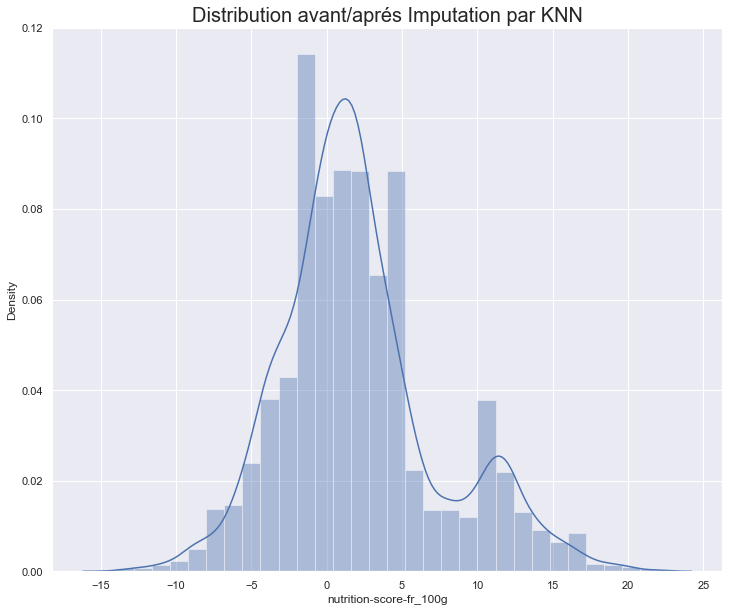

In [85]:
plt.figure(figsize=(12,10))
plt.title("Distribution avant/aprés Imputation par KNN",size=20)
sns.distplot(Data_sans_doublon['nutrition-score-fr_100g'], bins=30)
sns.distplot(df_final['nutrition-score-fr_100g'], bins=30)
plt.grid(True)
plt.legend(['DF', 'prediction'])

A partir du meilleur Hyperparamétre trouvé précedemment, nous allons imputer via le KNN.

In [86]:
imputer = KNNImputer(n_neighbors=9)
imputed = imputer.fit_transform(Data_sans_string)
df_imputed = pd.DataFrame(imputed, columns=Data_sans_string.columns)

In [87]:
df_imputed

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
0,0.0,0.0,144.0,0.90,2.50,1.8,3.60,0.00000,-4.333333,5.0
1,5.0,0.0,598.0,0.00,25.00,0.0,0.00,1.63322,8.666667,3.0
2,0.0,0.0,75.0,0.00,25.00,0.0,0.00,3.08356,-3.555556,2.0
3,2.0,0.0,79.0,0.00,3.08,0.8,0.77,0.56642,1.000000,5.0
4,2.0,0.0,427.0,6.78,4.24,1.7,1.69,1.50622,4.000000,6.0
...,...,...,...,...,...,...,...,...,...,...
23398,0.0,0.0,305.0,0.00,8.67,0.0,8.67,0.07620,-4.000000,4.0
23399,2.0,0.0,297.0,0.00,10.59,0.0,2.94,0.12700,1.000000,4.0
23400,2.0,0.0,297.0,0.00,11.76,0.0,2.94,0.12700,1.000000,4.0
23401,1.0,0.0,280.0,2.08,4.17,0.0,0.83,0.50800,3.000000,5.0


In [88]:
Data_1 =df_imputed.select_dtypes(include='float64')
print('Le pourcentage de valeurs manquantes pour les float est de',pourcentage_valeurs_manquantes(Data_1),'%')
print(f'Nous avons reussi à imputer tout les données manquantes chiffrées.')

Le pourcentage de valeurs manquantes pour les float est de 0.0 %
Nous avons reussi à imputer tout les données manquantes chiffrées.


In [89]:
df_string = Data_sans_doublon.select_dtypes(include='object')
df_string

,url,product_name,brands,countries_fr,nutrition_grade_fr,pnns_groups_1
0,http://world-fr.openfoodfacts.org/produit/0000...,Cauliflower,"Sainsbury's,by sainsbury's",Royaume-Uni,NaN,Fruits et Légumes
2,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,NaN,Inconnu
3,http://world-fr.openfoodfacts.org/produit/0000...,Cornichons,Trader Joe's,États-Unis,NaN,Inconnu
4,http://world-fr.openfoodfacts.org/produit/0001...,Diced In Tomato Juice,Trader Joe's,États-Unis,b,Inconnu
5,http://world-fr.openfoodfacts.org/produit/0001...,Vindaloo Sauce,Kroger,États-Unis,c,Inconnu
...,...,...,...,...,...,...
23479,http://world-fr.openfoodfacts.org/produit/9348...,Greek Nonfat Yogurt,Welch's,États-Unis,a,Inconnu
23480,http://world-fr.openfoodfacts.org/produit/9348...,Grade A Non Fat Yogurt,Welch's,États-Unis,b,Inconnu
23481,http://world-fr.openfoodfacts.org/produit/9348...,Blended Nonfat Yogurt,Welch's,États-Unis,b,Inconnu
23482,http://world-fr.openfoodfacts.org/produit/9376...,"Eatwell, Butternut Squash Pasta Sauce",Fresh & Easy,États-Unis,c,Inconnu


In [90]:
df_final = pd.concat([df_string,df_imputed],
                    axis = 1)

df_final = df_final[df_final['Known'] > 0]
df_final

,url,product_name,brands,countries_fr,nutrition_grade_fr,pnns_groups_1,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
0,http://world-fr.openfoodfacts.org/produit/0000...,Cauliflower,"Sainsbury's,by sainsbury's",Royaume-Uni,NaN,Fruits et Légumes,0.0,0.0,144.0,0.90,2.50,1.8,3.60,0.00000,-4.333333,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,598.0,0.00,25.00,0.0,0.00,1.63322,8.666667,3.0
2,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,NaN,Inconnu,0.0,0.0,75.0,0.00,25.00,0.0,0.00,3.08356,-3.555556,2.0
3,http://world-fr.openfoodfacts.org/produit/0000...,Cornichons,Trader Joe's,États-Unis,NaN,Inconnu,2.0,0.0,79.0,0.00,3.08,0.8,0.77,0.56642,1.000000,5.0
4,http://world-fr.openfoodfacts.org/produit/0001...,Diced In Tomato Juice,Trader Joe's,États-Unis,b,Inconnu,2.0,0.0,427.0,6.78,4.24,1.7,1.69,1.50622,4.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23398,http://world-fr.openfoodfacts.org/produit/8715...,Hot Ketchup,Heinz,Suisse,c,Inconnu,0.0,0.0,305.0,0.00,8.67,0.0,8.67,0.07620,-4.000000,4.0
23399,http://world-fr.openfoodfacts.org/produit/8718...,Earl Grey Tea,Lipton,France,c,Boissons,2.0,0.0,297.0,0.00,10.59,0.0,2.94,0.12700,1.000000,4.0
23400,http://world-fr.openfoodfacts.org/produit/8718...,Ketchup,Amora,France,d,Produits gras et Sauces,2.0,0.0,297.0,0.00,11.76,0.0,2.94,0.12700,1.000000,4.0
23401,http://world-fr.openfoodfacts.org/produit/8718...,Tomato Ketchup,Amora,France,d,Produits gras et Sauces,1.0,0.0,280.0,2.08,4.17,0.0,0.83,0.50800,3.000000,5.0


On va également modifier le nutrition_grade_fr pour ne plus avoir de NaN

__Pour calculer le nutriscore sur les aliments :__

A : < 0

B : 0 à 2

C : 3 à 10

D : 11 à 18

E : 19 à 40

__Pour calculer le nutriscore sur les boissons :__

A : Eau

B : <2

B : 2 à 5

C : 6 à 9

D : 10 à 40

Nous manquons cruellement de données pour pouvoir utiliser le principe du Nutriscore sur les types de produit.. de ce fait, on va utiliser celui pour les aliments.

On crée un Data_Frame ne possédant pas de nutrigrade ici pour vérifier combien de nutrigrade nous n'avons pas.

In [91]:
df_sans_nutriscore = df_final[df_final.nutrition_grade_fr.isna()]
df_sans_nutriscore

,url,product_name,brands,countries_fr,nutrition_grade_fr,pnns_groups_1,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known
0,http://world-fr.openfoodfacts.org/produit/0000...,Cauliflower,"Sainsbury's,by sainsbury's",Royaume-Uni,NaN,Fruits et Légumes,0.0,0.0,144.0,0.9,2.50,1.8,3.60,0.00000,-4.333333,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,598.0,0.0,25.00,0.0,0.00,1.63322,8.666667,3.0
2,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,NaN,Inconnu,0.0,0.0,75.0,0.0,25.00,0.0,0.00,3.08356,-3.555556,2.0
3,http://world-fr.openfoodfacts.org/produit/0000...,Cornichons,Trader Joe's,États-Unis,NaN,Inconnu,2.0,0.0,79.0,0.0,3.08,0.8,0.77,0.56642,1.000000,5.0
7,http://world-fr.openfoodfacts.org/produit/0001...,Salsa Autentica,Trader Joe's,États-Unis,NaN,Inconnu,0.0,0.0,172.0,0.0,8.20,1.6,0.00,0.01016,-1.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23333,http://world-fr.openfoodfacts.org/produit/8712...,Harira,Knorr,France,NaN,Aliments composés,0.0,0.0,17.0,0.0,0.10,0.0,0.50,0.00000,0.000000,3.0
23368,http://world-fr.openfoodfacts.org/produit/8712...,Soupe Paysanne aux Légumes Cuisinée au Lard,Knorr,France,NaN,Aliments composés,0.0,0.0,578.0,0.4,0.60,0.0,5.20,0.68072,-10.000000,1.0
23374,http://world-fr.openfoodfacts.org/produit/8712...,"Velouté de Potiron, Chanterelles et patate douce",Knorr,France,NaN,Aliments composés,0.0,0.0,438.0,0.4,18.60,0.0,0.70,0.00254,5.000000,5.0
23375,http://world-fr.openfoodfacts.org/produit/8712...,Douceur de Légumes d'Automne et Pointe de Crème,Knorr,"France,Suisse",NaN,Fruits et Légumes,0.0,0.0,179.0,0.4,10.50,0.0,0.70,0.01524,5.000000,3.0


On crée une boucle pour préparer la future colonne.

In [92]:
liste = []
for i in df_final['nutrition-score-fr_100g'] :
    if i <= 0 :
        liste.append(1),
    elif i in range (0,3) :
        liste.append(2),
    elif i in range(3,11) :
        liste.append(3),
    elif i in range(11,19) :
        liste.append(4),
    elif i in range(20,22) :
        liste.append(5)

On transforme la list en DataFrame.

In [93]:
df_nutrigrade = pd.DataFrame (liste)
df_nutrigrade

,0
0,1
1,1
2,2
3,3
4,1
...,...
23350,1
23351,2
23352,2
23353,3


In [94]:
# On remplace les chiffres par des lettres.
nutrition_grade_fr = df_nutrigrade.replace({ 1: 'A',
                                 2: 'B',
                                 3: 'C',
                                 4: 'D',
                                 5: 'E',
                                 })

In [95]:
nutrition_grade_fr

,0
0,A
1,A
2,B
3,C
4,A
...,...
23350,A
23351,B
23352,B
23353,C


In [96]:
#On supprime la colonne de base pour rajouter la nouvelle.
del df_final['nutrition_grade_fr']

In [97]:
df_final['nutrition_grade_fr'] = nutrition_grade_fr

### Suppression des données impossible à collecter :

In [98]:
# Detection de tout les NaN
column_with_nan = df_final.columns[df_final.isnull().any()]
df_final.shape
# boucle 
for column in column_with_nan:
    print(column, df_final[column].isnull().sum())

url 81
product_name 81
brands 81
countries_fr 93
pnns_groups_1 81
nutrition_grade_fr 48


Il est impossible de récupérer les pays dans l'état on supprime donc les colonnes avec les pays manquants..

In [99]:
# On supprime le reste des données qu'on ne peut pas modifier.
df_final = df_final.dropna()

In [100]:
df_final = df_final.dropna()
df_final

,url,product_name,brands,countries_fr,pnns_groups_1,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known,nutrition_grade_fr
0,http://world-fr.openfoodfacts.org/produit/0000...,Cauliflower,"Sainsbury's,by sainsbury's",Royaume-Uni,Fruits et Légumes,0.0,0.0,144.0,0.90,2.50,1.8,3.60,0.00000,-4.333333,5.0,A
2,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,Inconnu,0.0,0.0,75.0,0.00,25.00,0.0,0.00,3.08356,-3.555556,2.0,B
3,http://world-fr.openfoodfacts.org/produit/0000...,Cornichons,Trader Joe's,États-Unis,Inconnu,2.0,0.0,79.0,0.00,3.08,0.8,0.77,0.56642,1.000000,5.0,C
4,http://world-fr.openfoodfacts.org/produit/0001...,Diced In Tomato Juice,Trader Joe's,États-Unis,Inconnu,2.0,0.0,427.0,6.78,4.24,1.7,1.69,1.50622,4.000000,6.0,A
5,http://world-fr.openfoodfacts.org/produit/0001...,Vindaloo Sauce,Kroger,États-Unis,Inconnu,2.0,0.0,372.0,3.80,0.00,1.3,8.86,0.00000,-5.000000,4.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23350,http://world-fr.openfoodfacts.org/produit/8712...,Douceur de courgettes au chèvre frais,Knorr,France,Aliments composés,2.0,0.0,307.0,4.80,4.40,0.5,1.20,0.77000,3.000000,6.0,A
23351,http://world-fr.openfoodfacts.org/produit/8712...,Mouliné de tomates au basilic,Knorr,France,Aliments composés,3.0,0.0,586.0,0.60,26.00,0.0,0.80,1.70000,13.000000,5.0,B
23352,http://world-fr.openfoodfacts.org/produit/8712...,Sensations Crème Forestière à l'huile aromatis...,Knorr,"Belgique,France",Aliments composés,5.0,0.0,787.0,12.20,0.10,0.0,11.10,1.90000,13.000000,5.0,B
23353,http://world-fr.openfoodfacts.org/produit/8712...,Douceur de légumes du soleil avec une pointe d...,Knorr,France,Aliments composés,7.0,0.0,197.0,0.00,0.10,3.1,3.12,0.39624,13.000000,4.0,C


In [101]:
#### Exemple de Marques qu'on peut retrouver dans l'analyse.

In [102]:
df_final[df_final['brands'].str.contains('Mt. Olive')]

,url,product_name,brands,countries_fr,pnns_groups_1,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known,nutrition_grade_fr
2,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,Inconnu,0.0,0.0,75.0,0.0,25.00,0.0,0.00,3.08356,-3.555556,2.0,B
24,http://world-fr.openfoodfacts.org/produit/0009...,Jalapeno Slices,Mt. Olive,États-Unis,Inconnu,6.0,0.0,556.0,0.0,20.00,0.0,0.00,1.27000,-8.000000,3.0,A
25,http://world-fr.openfoodfacts.org/produit/0009...,Sliced Jalapeno Peppers,Mt. Olive,États-Unis,Inconnu,4.0,0.0,0.0,0.0,20.00,0.0,0.00,2.63144,-8.000000,1.0,A
26,http://world-fr.openfoodfacts.org/produit/0009...,Hot Dog Relish,Mt. Olive,États-Unis,Inconnu,6.0,0.0,75.0,0.0,20.00,0.0,0.00,2.35966,-8.000000,2.0,A
27,http://world-fr.openfoodfacts.org/produit/0009...,Squeeze Sweet Relish,Mt. Olive,États-Unis,Inconnu,4.0,0.0,75.0,0.0,20.00,0.0,0.00,2.35966,-8.000000,2.0,A
28,http://world-fr.openfoodfacts.org/produit/0009...,Hamburger Dill Chips,Mt. Olive,États-Unis,Inconnu,3.0,0.0,372.0,0.0,17.86,0.0,0.00,1.63322,-8.000000,3.0,A
29,http://world-fr.openfoodfacts.org/produit/0009...,Baby Dills,Mt. Olive,États-Unis,Inconnu,4.0,0.0,75.0,0.0,17.86,0.0,0.00,2.40284,-8.000000,2.0,A
30,http://world-fr.openfoodfacts.org/produit/0009...,Sandwich Stuffers Kosher Dill,Mt. Olive,États-Unis,Inconnu,4.0,0.0,75.0,0.0,17.86,0.0,0.00,2.35966,-8.000000,2.0,A
31,http://world-fr.openfoodfacts.org/produit/0009...,Old-Fashioned Sweet Bread & Butter Chips,Mt. Olive,États-Unis,Inconnu,5.0,0.0,151.0,0.0,17.86,0.0,0.00,2.81178,-8.000000,2.0,A
32,http://world-fr.openfoodfacts.org/produit/0009...,Kosher Hamburger Dill Chips,Mt. Olive,États-Unis,Inconnu,5.0,0.0,0.0,0.0,17.86,0.0,0.00,1.52400,-8.000000,1.0,A


In [103]:
# On a confirmation qu'il n'y a plus aucune données manquantes, et que tout est bien renseigné.
## On peut également constaté que dans notre analyse, la colonne URL ainsi que la colonne pnns n'a que peu d'interet ..

## Création du fichier CSV pour Analyse :

In [104]:
df_final.to_csv("P2_data_clean.csv", index=False)

In [105]:
df_final

,url,product_name,brands,countries_fr,pnns_groups_1,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Known,nutrition_grade_fr
0,http://world-fr.openfoodfacts.org/produit/0000...,Cauliflower,"Sainsbury's,by sainsbury's",Royaume-Uni,Fruits et Légumes,0.0,0.0,144.0,0.90,2.50,1.8,3.60,0.00000,-4.333333,5.0,A
2,http://world-fr.openfoodfacts.org/produit/0000...,Sweet 'N' Hot Salad Peppers,Mt. Olive,États-Unis,Inconnu,0.0,0.0,75.0,0.00,25.00,0.0,0.00,3.08356,-3.555556,2.0,B
3,http://world-fr.openfoodfacts.org/produit/0000...,Cornichons,Trader Joe's,États-Unis,Inconnu,2.0,0.0,79.0,0.00,3.08,0.8,0.77,0.56642,1.000000,5.0,C
4,http://world-fr.openfoodfacts.org/produit/0001...,Diced In Tomato Juice,Trader Joe's,États-Unis,Inconnu,2.0,0.0,427.0,6.78,4.24,1.7,1.69,1.50622,4.000000,6.0,A
5,http://world-fr.openfoodfacts.org/produit/0001...,Vindaloo Sauce,Kroger,États-Unis,Inconnu,2.0,0.0,372.0,3.80,0.00,1.3,8.86,0.00000,-5.000000,4.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23350,http://world-fr.openfoodfacts.org/produit/8712...,Douceur de courgettes au chèvre frais,Knorr,France,Aliments composés,2.0,0.0,307.0,4.80,4.40,0.5,1.20,0.77000,3.000000,6.0,A
23351,http://world-fr.openfoodfacts.org/produit/8712...,Mouliné de tomates au basilic,Knorr,France,Aliments composés,3.0,0.0,586.0,0.60,26.00,0.0,0.80,1.70000,13.000000,5.0,B
23352,http://world-fr.openfoodfacts.org/produit/8712...,Sensations Crème Forestière à l'huile aromatis...,Knorr,"Belgique,France",Aliments composés,5.0,0.0,787.0,12.20,0.10,0.0,11.10,1.90000,13.000000,5.0,B
23353,http://world-fr.openfoodfacts.org/produit/8712...,Douceur de légumes du soleil avec une pointe d...,Knorr,France,Aliments composés,7.0,0.0,197.0,0.00,0.10,3.1,3.12,0.39624,13.000000,4.0,C
